<a href="https://colab.research.google.com/github/kesavakrishna1/3-2Project/blob/main/4.1/Another_copy_of_b_to_b_SCG_to_ECG_signal_1_without_bandpass_filter_DEC21_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install tensorflow


In [ ]:
import tensorflow
print(tensorflow.__version__)

2.14.0


In [1]:
from tensorflow.keras.layers import LayerNormalization

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# from tensorflow.python.client import device_lib
# print(device_lib.list_local_devices())

In [4]:
!pip install git+https://www.github.com/keras-team/keras-contrib.git

  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-or9xtylv
  Running command git clone --filter=blob:none --quiet https://www.github.com/keras-team/keras-contrib.git /tmp/pip-req-build-or9xtylv
  Resolved https://www.github.com/keras-team/keras-contrib.git to commit 3fc5ef709e061416f4bc8a92ca3750c824b5d2b0
  Preparing metadata (setup.py) ... done
  Created wheel for keras-contrib: filename=keras_contrib-2.0.8-py3-none-any.whl size=101055 sha256=d623567ce31e908be1d022b5231af1cc4346d284440620b9e26332bd9c50938a
  Stored in directory: /tmp/pip-ephem-wheel-cache-v1p7vlub/wheels/74/d5/f7/0245af7ac33d5b0c2e095688649916e4bf9a8d6b3362a849f5
Successfully built keras-contrib


In [5]:
!pip install --upgrade keras
!pip install --upgrade tensorflow
!pip install -U tensorflow
!python -m pip show tensorflow
!pip install --upgrade tensorflow
!python -m pip show tensorflow
!pip install tensorflow-addons
!pip install -q tensorflow-addons
!pip install --upgrade tensorflow
!pip install utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 999.1/999.1 kB 10.7 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.14.0 requires keras<2.15,>=2.14.0, but you have keras 3.0.1 which is incompatible.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 76.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 41.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 63.8 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.14.0
    Uninstalling tensorflow-estimator-2.14.0:
      Successfully uninstalled tensorflow-estimator-2.14.0
  Attempting uninstall: keras
    Found existing installation: keras 3.0.1
    Uninstalling keras-3.0.1:
      Successfully uninstalled keras-3.0.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.14.1
    Uninstalling tensorboard-2.14.1:
      Successfully uninstalled tensorboard-2.14.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.14.0
    Uninstalling tensorflow-2.14.0:
      Successfully un

Name: tensorflow
Version: 2.15.0.post1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine-rl
Name: tensorflow
Version: 2.15.0.post1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, proto

In [6]:
!pip install pyedflib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 14.0 MB/s eta 0:00:00


In [7]:
!pip install padasip

  Preparing metadata (setup.py) ... done
  Created wheel for padasip: filename=padasip-1.2.2-py3-none-any.whl size=51651 sha256=a0e9cef3645cb8c871d773b406e45dc6532eb8d7af1da7aea6729b2511c1839c
  Stored in directory: /root/.cache/pip/wheels/a0/bb/e7/b57f417dbad7d85dbcb177f2c185543ca34a1b36541f115e95
Successfully built padasip


In [8]:
fileNames = []
fileName_str = []
#Change the number here to read different files
for i in range(10,11,1):
  name_str = ''
  if(i<10):
    name_str = 'b00'
  else:
    name_str = 'b0'
  fileNames.append(name_str+ str(i)+'.edf')
  fileName_str.append(name_str+ str(i))

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, find_peaks

In [10]:
import pyedflib
import numpy as np
from scipy import signal
from scipy.signal import butter, filtfilt
from sklearn.decomposition import FastICA
from sklearn.preprocessing import scale
import padasip as pa
from scipy import signal
from tensorflow.keras.layers import LeakyReLU
from keras.layers import LeakyReLU
original_scg = []
original_ecg = []
class DataUtils:

    def __init__(self) -> None:
        super().__init__()
        self.fileNames = fileNames


    # def readData(self, sigNum, path="/content/drive/MyDrive/Colab Notebooks/basal/"):
    def readData(self, sigNum, path="/content/drive/MyDrive/drive-download-20230428T081947Z-001/"):
        file_name = path + self.fileNames[sigNum]
        #print(file_name)
        #file_name =  self.fileNames[sigNum]
        f = pyedflib.EdfReader(file_name)
        n = f.signals_in_file
        signal_labels = f.getSignalLabels()
        print("Reading file:: ",file_name)
        print("different columns:: ",signal_labels)
        print("total number of samples",f.getNSamples())
        abdECG = np.zeros((1, f.getNSamples()[0]))
        scg = np.zeros((1, f.getNSamples()[0]))
        scg[0, :] = f.readSignal(3)
        scg = scale(scg, axis=1)
        #scg[0, :] = scale(self.butter_bandpass_filter(scg, 1, 200, 1000), axis=1)
        #for i in np.arange(0, n-2):
        abdECG[0, :] = f.readSignal(0)
        abdECG = scale(abdECG, axis=1)
        #abdECG = scale(self.butter_bandpass_filter(abdECG, 1, 110, 1000), axis=1)
        print("before downsampling",abdECG.shape[1])
        abdECG = signal.resample(abdECG, int(abdECG.shape[1] / 5), axis=1)
        scg = signal.resample(scg, int(scg.shape[1] / 5), axis=1)

        # # differencing code starts
        # scg = np.diff(scg)
        # abdECG = np.diff(abdECG)
        # # differencing code ends

        print("after downsampling",abdECG.shape[1])
        '''function for ecg identification, using pan-tompkins algorithm'''
        fs = []
        fs.append(f.getSampleFrequency(0))

        #changed the return sequence, so that converion will be from SCG to ECG
        return  scg, abdECG, fs

    def windowingSig(self, sig1, sig2, windowSize=15):
        signalLen = sig2.shape[1]
        signalsWindow1 = [sig1[:, int(i):int(i + windowSize)].transpose() for i in range(0, signalLen - windowSize, windowSize)]
        signalsWindow2 = [sig2[:, int(i):int(i + windowSize)].transpose() for i in range(0, signalLen - windowSize, windowSize)]
        print("SCG shape after windowing:: ",np.array(signalsWindow1).shape)
        print("ECG shape after windowing:: ",np.array(signalsWindow2).shape)

        return signalsWindow1, signalsWindow2

    def adaptFilterOnSig(self, src, ref):
        f = pa.filters.FilterNLMS(n=4, mu=0.1, w="random")
        for index, sig in enumerate(src):
            try:
                y, e, w = f.run(ref[index][:, 0], sig)
                ref[index][:, 0] = e
            except:
                pass

        return ref

    def calculateICA(self, sdSig, component=7):
        ica = FastICA(n_components=component, max_iter=1000)
        icaRes = []
        for index, sig in enumerate(sdSig):
            try:
                icaSignal = np.array(ica.fit_transform(sig))
                icaSignal = np.append(icaSignal, sig[:, range(2, 4)], axis=1)
                icaRes.append(icaSignal)
            except:
                pass
        return np.array(icaRes)

    def createDelayRepetition(self, signal, numberDelay=4, delay=10):
        signal = np.repeat(signal, numberDelay, axis=0)
        #print("createDelayRepetition::",signal.shape)
        for row in range(1, signal.shape[0]):
            signal[row, :] = np.roll(signal[row, :], shift=delay * row)

        #print("createDelayRepetition 2::",signal.shape)
        return signal

    def __butter_bandpass(self, lowcut, highcut, fs, order=5):
        #print("00")
        nyq = 0.5 * fs
        #print("0")
        low = lowcut / nyq
        #print("11")
        high = highcut / nyq
        b, a = butter(order, [low, high], btype='band')
        #print("1")
        return b, a

    def butter_bandpass_filter(self, data, lowcut, highcut, fs, order=3, axis=1):
        #print("In butter_bandpass_filter")
        b, a = self.__butter_bandpass(lowcut, highcut, fs, order=order)
        y = filtfilt(b, a, data, axis=axis)
        #print("2")
        return y

In [11]:
'''function for ecg identification, using pan-tompkins algorithm'''

def codeFn(ecg, fs):
    nyquist = 0.5 * fs
    low_cutoff = 5
    high_cutoff = 15
    b, a = butter(1, [low_cutoff/nyquist, high_cutoff/nyquist], btype='band')
    ecg_filt = filtfilt(b, a, ecg)

    b = np.array([1, 0, -1])
    ecg_diff = np.convolve(ecg_filt, b, mode='same')
    ecg_sq = ecg_diff ** 2

    ma_len = int(0.08 * fs)
    ecg_ma = np.convolve(ecg_sq, np.ones(ma_len)/ma_len, mode='same')

    qrs_idx, _ = find_peaks(ecg_ma, distance=int(0.2 * fs), height=0.2 * np.max(ecg_ma))

    return qrs_idx


In [12]:
from sklearn.model_selection import train_test_split

#from Utils.DataUtils import DataUtils
import numpy as np
import copy

class TrainUtils:
    def __init__(self) -> None:
        super().__init__()
        self.dataUtils = DataUtils()

    def prepareData(self, delay=5, path="/content/drive/MyDrive/drive-download-20230428T081947Z-001/b010.edf"):
        scgAll, ecg, fs = self.dataUtils.readData(0,path)
        print(scgAll.shape)
        #print("scg shape:: ",ecg.shape)
        scgAll = scgAll[range(1), :]
        #print("Number of samples:: ",scg.shape)
        delayNum = scgAll.shape[0]
        ecgAll = self.dataUtils.createDelayRepetition(ecg, delayNum, delay)
        #print("scg all shape:: ",ecgAll.shape)
        for i in range(1, len(fileNames)):
            scg, ecg = self.dataUtils.readData(i,path)
            print("Number of samples:: ",ecg.shape)
            scg = scg[range(1), :]
            ecgDelayed = self.dataUtils.createDelayRepetition(ecg, 1, delay)
            scgAll = np.append(scgAll, scg, axis=1)
            ecgAll = np.append(ecgAll, ecgDelayed, axis=1)
        #print("SCG all merged shape:: ", scg.shape)
        print("ECG all merged shape:: ", ecgAll.shape)

        original_scg = scgAll
        original_ecg = ecgAll
        scgWindows, ecgWindows = self.dataUtils.windowingSig(scgAll, ecgAll, windowSize=1000)
        # ecgWindows = self.dataUtils.adaptFilterOnSig(scgWindows, ecgWindows)
        # scgWindows = self.dataUtils.calculateICA(scgWindows, component=2)
        return scgWindows, ecgWindows

    def trainTestSplit(self, sig, label, trainPercent, shuffle=True):
        print("Splitting into train and test:: ")
        X_train, X_test, y_train, y_test = train_test_split(sig, label, train_size=trainPercent, shuffle=False)
        X_train = np.array(X_train)
        #X_train = self.window_the_data(X_train,  60)
        X_test = np.array(X_test)
        #X_test = self.window_the_data(X_test,  60)
        y_train = np.array(y_train)
        y_test = np.array(y_test)
        return X_train, X_test, y_train, y_test

    def window_the_data(self,data,window=32):
      r = list()
      for i, mat in enumerate(data):
        s = 0
        a = list()
        print(data.shape)
        while s + window < 256:
          a.append(copy.deepcopy(mat[s : s + window].T))
          # for i,x in enumerate(a):
            # a[i] = scaler.fit_transform(x)
          s += 2
        r.append(copy.deepcopy(a))
        #print(r.shape())


      r = np.array(r)
      return copy.deepcopy(r)

In [13]:
# '''function for ecg identification, using pan-tompkins algorithm'''

# def codeFn(ecg, fs):
#     nyquist = 0.5 * fs
#     low_cutoff = 5
#     high_cutoff = 15
#     b, a = butter(1, [low_cutoff/nyquist, high_cutoff/nyquist], btype='band')
#     ecg_filt = filtfilt(b, a, ecg)

#     b = np.array([1, 0, -1])
#     ecg_diff = np.convolve(ecg_filt, b, mode='same')
#     ecg_sq = ecg_diff ** 2

#     ma_len = int(0.08 * fs)
#     ecg_ma = np.convolve(ecg_sq, np.ones(ma_len)/ma_len, mode='same')

#     qrs_idx, _ = find_peaks(ecg_ma, distance=int(0.2 * fs), height=0.2 * np.max(ecg_ma))

#     return qrs_idx

# # f=readData(,,)
# fs = f.getSampleFrequency(0)

    **added 2 discriminators**

---

* line 103, 104 self.image shape c and d
* line 124 - 140 discriminator c and d
* line 151, 152 modified generators
* line 167, 168 added fake_c and d
* line 286 and 287 added batches C and D
* line 299-302 added imgs_c, imgs_d
* line 310, 311 fake_c and d
* line 315, 316 added reconstr_c and d
* line 324 added img_c and d for g_loss
* line 326-332 added dC and dD loss real and fake
* line 335 modified d_loss
* line 376-384 added fake_c and d, reconstr_c and d
* line 394 added imgs_C, fake_D, reconstr_C, imgs_D, fake_C, reconstr_D to gen_imgs


In [757]:

from __future__ import print_function, division

import datetime
import os

import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
# from tensorflow_addons.layers import InstanceNormalization
from tensorflow.keras.optimizers import Adam
import numpy as np
import datetime
import os
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam as legacy_optimizers
from tensorflow.keras.layers import LayerNormalization
from tensorflow.keras.losses import Huber
from tensorflow.keras.layers import LayerNormalization
# from dateutil import Dateutils


import matplotlib.pyplot as plt
import numpy as np
import keras.backend as K
from keras import Input, Model
from keras.layers import Conv1D, UpSampling1D, LeakyReLU, Dropout, Lambda, Embedding, Bidirectional, LSTM, Dense, Flatten, Layer, MultiHeadAttention, LayerNormalization, GlobalAveragePooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import legacy as legacy_optimizers
from keras_contrib.layers import InstanceNormalization
#from keras_self_attention import ScaledDotProductAttention
#from keras_self_attention.backend import regularizers
from sklearn.preprocessing import scale

import tensorflow as tf
from tensorflow.python.keras import Sequential
# from tensorflow.python.keras.layers import Normalization
from tensorflow.keras.layers import Normalization

#from Utils.DataUtils import DataUtils





import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
# from tensorflow_addons.layers import InstanceNormalization
from tensorflow.keras.optimizers import Adam
import numpy as np
import datetime
import os
!pip install tensorflow-addons
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam as legacy_optimizers
from tensorflow.keras.layers import LayerNormalization
# from tensorflow.keras.losses import huber_loss
from tensorflow.keras.layers import LayerNormalization
# from dateutils import Dateutils

# class TransformerBlock(Layer):
#     def _init_(self, embed_dim, num_heads, rate=0.1):
#         super(TransformerBlock, self)._init_()
#         self.att = MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
#         # self.ffn = Sequential(
#         #     [Dense(ff_dim, activation="relu"), Dense(embed_dim), ]
#         # )
#         #print("apply layered normalization")
#         self.layernorm1 = LayerNormalization(epsilon=1e-4)
#         # self.layernorm2 = LayerNormalization(epsilon=1e-6)
#         #print("apply dropout")
#         self.dropout1 = Dropout(rate)
#         # self.dropout2 = Dropout(rate)

#     def call(self, inputs):
#         #print("In call function of transformer")
#         attn_output = self.att(inputs, inputs)
#         attn_output = self.dropout1(attn_output)
#         out1 = self.layernorm1(inputs * attn_output)
#         # ffn_output = self.ffn(out1)
#         # ffn_output = self.dropout2(ffn_output)
#         return out1
#     def get_config(self):
#         """
#             For rebuilding models on load time.
#         """

#         #config = {
#         #    'output_dim': self.output_dim,
#         #    'units': self.units,
#         #    'return_probabilities': self.return_probabilities
#         #}
#         base_config = super(TransformerBlock, self).get_config()
#         return dict(list(base_config.items()))
class TransformerBlock(Layer):
    def __init__(self, embed_dim, num_heads, rate=0.01):
        super(TransformerBlock, self).__init__()
        self.att = MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        # self.ffn = Sequential(
        #     [Dense(ff_dim, activation="relu"), Dense(embed_dim), ]
        # )
        #print("apply layered normalization")
        self.layernorm1 = LayerNormalization(epsilon=1e-4)
        # self.layernorm2 = LayerNormalization(epsilon=1e-6)
        #print("apply dropout")
        self.dropout1 = Dropout(rate)
        # self.dropout2 = Dropout(rate)

    def call(self, inputs):
        #print("In call function of transformer")
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output)
        out1 = self.layernorm1(inputs * attn_output)
        # ffn_output = self.ffn(out1)
        # ffn_output = self.dropout2(ffn_output)
        return out1

    def get_config(self):
        """
            For rebuilding models on load time.
        """

        #config = {
        #    'output_dim': self.output_dim,
        #    'units': self.units,
        #    'return_probabilities': self.return_probabilities
        #}
        base_config = super(TransformerBlock, self).get_config()
        return dict(list(base_config.items()))



def batch_creation(x_train, y_train, batch_size, batch_idx):
    batchA = x_train[batch_idx * batch_size: (batch_idx + 1) * batch_size]
    batchB = y_train[batch_idx * batch_size: (batch_idx + 1) * batch_size]
    return batchA, batchB

# @tf.autograph.experimental.do_not_convert
class CycleGAN:
    def __init__(self, row, col):
        gpus = tf.config.experimental.list_physical_devices('GPU')
        if gpus:
            try:
                # Restrict TensorFlow to only use the fourth GPU
                tf.config.experimental.set_visible_devices(gpus[0], 'GPU')

                # Currently, memory growth needs to be the same across GPUs
                for gpu in gpus:
                    tf.config.experimental.set_memory_growth(gpu, True)
                logical_gpus = tf.config.experimental.list_logical_devices('GPU')
                print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
            except RuntimeError as e:
                # Memory growth must be set before GPUs have been initialized
                print(e)
        self.dataUtils = DataUtils()
        self.img_rows = row
        self.img_cols = col
        self.channels = 1
        self.img_shape = (self.img_rows, self.img_cols)
        self.img_shape_b = (self.img_rows, 1)
        self.dataset_name = 'ECG2FECG'

        # Calculate output shape of D (PatchGAN)
        patch = int(self.img_rows / 2 ** 4)
        self.disc_patch = (self.img_rows, 1)

        # Number of filters in the first layer of G and D
        self.gf = 6
        self.df = 13

        # Loss weights
        self.lambda_cycle = 4.0  # Cycle-consistency loss
        self.lambda_id = 0.01 * self.lambda_cycle  # Identity loss

        # optimizer = Adam()
        optimizer = tf.keras.optimizers.legacy.Adam()


        # Build and compile the discriminators
        self.d_A1 = self.build_discriminator(self.img_shape)
        self.d_A2 = self.build_discriminator(self.img_shape)
        self.d_B1 = self.build_discriminator(self.img_shape_b)
        self.d_B2 = self.build_discriminator(self.img_shape_b)

        # Build the generators
        self.g_AB = self.build_generator(self.img_shape)
        self.g_BA = self.build_generator(self.img_shape_b)

        # Compile discriminators
        self.d_A1.compile(loss='MSE', optimizer=optimizer, metrics=['accuracy'])
        self.d_A2.compile(loss='MSE', optimizer=optimizer, metrics=['accuracy'])
        self.d_B1.compile(loss='MSE', optimizer=optimizer, metrics=['accuracy'])
        self.d_B2.compile(loss='MSE', optimizer=optimizer, metrics=['accuracy'])

        # Input images from both domains
        img_A = Input(shape=self.img_shape)
        img_B = Input(shape=self.img_shape_b)

        # Translate images to the other domain
        fake_B = self.g_AB(img_A)
        fake_A = self.g_BA(img_B)

        # Translate images back to original domain
        reconstr_A = self.g_BA(fake_B)
        reconstr_B = self.g_AB(fake_A)
        #print("1")
        # Identity mapping of images
        img_A_id = self.g_BA(img_A)
        img_B_id = self.g_AB(img_B)

        #print("2")
        # For the combined model we will only train the generators
        # self.d_A1.trainable = False
        # self.d_A2.trainable = False
        # self.d_B1.trainable = False
        # self.d_B2.trainable = False
        self.d_A1.trainable = True
        self.d_A2.trainable = True
        self.d_B1.trainable = True
        self.d_B2.trainable = True
        #print("3")

        # Discriminators determine validity of translated images
        valid_A1 = self.d_A1(fake_A)
        valid_A2 = self.d_A2(fake_A)
        valid_B1 = self.d_B1(fake_B)
        valid_B2 = self.d_B2(fake_B)

        # # Combined model trains generators to fool discriminators
        self.combined = Model(inputs=[img_A, img_B],
                              outputs=[valid_A1, valid_B1, valid_A2, valid_B2,
                                       fake_B, fake_A,
                                       reconstr_A, reconstr_B])

        # Combined model trains generators to fool discriminators
        # self.combined = Model(inputs=[img_A, img_B],
        #                       outputs=[valid_A1, valid_A2, valid_B1, valid_B2,
        #                                fake_B, fake_A,
        #                                reconstr_A, reconstr_B])

        # Compile the combined model
        self.combined.compile(loss=['huber_loss', 'huber_loss', 'huber_loss', 'huber_loss', 'huber_loss', 'huber_loss', 'huber_loss', 'huber_loss'],
                              loss_weights=[1, 1, self.lambda_cycle, self.lambda_cycle, self.lambda_id, self.lambda_id],
                              optimizer=optimizer)

        # self.combined.compile(loss=[Huber(), Huber(), Huber(), Huber(), Huber(), Huber(), Huber(), Huber()],
        #                       loss_weights=[1, 1, self.lambda_cycle, self.lambda_cycle, self.lambda_id, self.lambda_id],
        #                       optimizer=optimizer)
    # Define custom loss
    def custom_loss(self):

        # Create a loss function that adds the MSE loss to the mean of all squared activations of a specific layer
        def loss(y_true, y_pred):
            return K.mean(y_true * K.log(y_true / y_pred + K.epsilon()))

        # Return a function
        return loss

    def build_generator(self,img_shape):
        """U-Net Generator"""
        print("In build generator")
        def conv1DWithSINE(layer_input, filters, f_size=30):
            """Layers used during downsampling"""
            # d = Conv1D(filters, kernel_size=f_size, padding='same', activation='sigmoid')(layer_input)
            d = Conv1D(filters, kernel_size=f_size, padding='same', activation='LeakyReLU')(layer_input)
            d = InstanceNormalization()(d)
            return d

        def multiply(x):
            mask,image  = x
            return image* K.clip(mask,0.8,1)

        input = Input(shape=img_shape)
        print("Input shape:: ", input.shape)
        # value = conv1DWithSINE(input, input.shape[2], f_size=30)
        value = conv1DWithSINE(input, 30, f_size=30)
        print(" shape after conv1d :: ", value.shape)

        print("apply attention.")
        att = TransformerBlock(embed_dim=input.shape[1], num_heads=2)(value)
        print("shape after attention:: ",att.shape )
        att = Normalization(axis=1)(att)
        print("shape after normalizing attention:: ",att.shape )

        remainedInput = Lambda(multiply)([att, value])
        print("shape after apply lambda:: ",remainedInput.shape )

        output_img = conv1DWithSINE(remainedInput, 17, f_size=30)
        output_img = conv1DWithSINE(output_img, 13, f_size=30)
        output_img = conv1DWithSINE(output_img, 13, f_size=30)
        output_img = conv1DWithSINE(output_img, 1, f_size=1)

        return Model(input, output_img)

    def build_discriminator(self,img_shape):
        print("In building discriminator")
        def d_layer(layer_input, filters, f_size=13, normalization=True):
            """Discriminator layer"""
            # d = Conv1D(filters, kernel_size=f_size, padding='same',activation='sigmoid')(layer_input)
            d = Conv1D(filters, kernel_size=f_size, padding='same',activation='LeakyReLU')(layer_input)
            if normalization:
                d = InstanceNormalization()(d)
            return d

        img = Input(shape=img_shape)
        print("input shape:: ",img.shape)
        d1 = d_layer(img, self.df)
        print("input shape after first conv1d:: ",d1.shape)
        d2 = d_layer(d1, 13)
        print("input shape after second conv1d:: ",d2.shape)
        d3 = d_layer(d2, 13)
        print("input shape after third conv1d:: ",d3.shape)
        validity = d_layer(d3, 1)
        # validity = d_layer(d3, img.shape[1])
        print("final shape after 4th layer:: ",validity.shape)


        return Model(img, validity)

    def train(self, x_train, y_train, epochs, batch_size=1, sample_interval=20):
        print("Num Samples", x_train.shape[0])
        print("In train:: ")
        start_time = datetime.datetime.now()

        # Adversarial loss ground truths
        valid = np.ones((batch_size,) + self.disc_patch)
        fake = np.zeros((batch_size,) + self.disc_patch)

        for epoch in range(epochs):
            for batch_idx in range(x_train.shape[0] // batch_size):
                batchA, batchB = batch_creation(x_train, y_train, batch_size, batch_idx)
                batchA = np.asarray(batchA)
                batchB = np.asarray(batchB)

                imgs_A = batchA
                imgs_B = batchB

                imgs_B = np.reshape(imgs_B, (-1, x_train.shape[1], x_train.shape[2]))
                imgs_A = np.reshape(imgs_A, (-1, x_train.shape[1], x_train.shape[2]))

                # ----------------------
                #  Train Discriminators
                # ----------------------

                # Translate images to the other domain
                fake_B = self.g_AB.predict(imgs_A)
                fake_A = self.g_BA.predict(imgs_B)
                # fake_D = self.g_AB.predict(imgs_C)
                # fake_C = self.g_BA.predict(imgs_D)

                # Translate images back to original domain
                reconstr_A = self.g_BA.predict(fake_B)
                reconstr_B = self.g_AB.predict(fake_A)
                # reconstr_C = self.g_BA.predict(fake_D)
                # reconstr_D = self.g_AB.predict(fake_C)

                # Train the discriminators (original images = real / translated = Fake)
                dA_loss_real = self.d_A1.train_on_batch(imgs_A, valid)
                dA_loss_fake = self.d_A1.train_on_batch(fake_A, fake)
                dA_loss = 0.5 * np.add(dA_loss_real, dA_loss_fake)

                dB_loss_real = self.d_B1.train_on_batch(imgs_B, valid)
                dB_loss_fake = self.d_B1.train_on_batch(fake_B, fake)
                dB_loss = 0.5 * np.add(dB_loss_real, dB_loss_fake)

                dC_loss_real = self.d_A2.train_on_batch(imgs_A, valid)
                dC_loss_fake = self.d_A2.train_on_batch(fake_A, fake)
                dC_loss = 0.5 * np.add(dC_loss_real, dC_loss_fake)

                dD_loss_real = self.d_B2.train_on_batch(imgs_B, valid)
                dD_loss_fake = self.d_B2.train_on_batch(fake_B, fake)
                dD_loss = 0.5 * np.add(dD_loss_real, dD_loss_fake)

                # Total discriminator loss
                # d_loss = 0.25 * (dA_loss + dB_loss + dC_loss + dD_loss)
                # Total discriminator loss
                d_loss = 0.25 * (np.add(np.add(dA_loss, dB_loss), np.add(dC_loss, dD_loss)))

                # d_loss = 0.25 * np.add(dA_loss, dB_loss, dC_loss, dD_loss)

                # Discriminators determine validity of translated images
                # valid_A1 = self.d_A1(fake_A)
                # valid_A2 = self.d_A2(fake_A)
                # valid_B1 = self.d_B1(fake_B)
                # valid_B2 = self.d_B2(fake_B)

                # # Combined model trains generators to fool discriminators
                # self.combined.compile(loss=[Huber(), Huber(), Huber(), Huber(), Huber(), Huber()],
                #                       loss_weights=[1, 1, self.lambda_cycle, self.lambda_cycle, self.lambda_id, self.lambda_id],
                #                       optimizer=tf.keras.optimizers.legacy.Adam())

                g_loss = self.combined.train_on_batch([imgs_A, imgs_B],
                                                      [valid, valid, valid, valid,
                                                       imgs_B, imgs_A,
                                                       reconstr_A, reconstr_B])


                # ------------------
                #  Train Generators
                # ------------------

                # Train the generators

                # g_loss = self.combined.train_on_batch([imgs_A, imgs_B, imgs_C, imgs_D],
                #                                       [valid, valid, valid, valid,
                #                                        imgs_B, imgs_A, imgs_D, imgs_C,
                #                                        reconstr_A, reconstr_B,
                #                                        reconstr_C, reconstr_D])
                # g_loss = self.combined.train_on_batch([imgs_A, imgs_B],
                #                                       [valid, valid,
                #                                        imgs_B, imgs_A,
                #                                        reconstr_A, reconstr_B])
                # g_loss = self.combined.train_on_batch([imgs_A, imgs_B, imgs_C, imgs_D],
                #                       [valid, valid, valid, valid,
                #                        imgs_B, imgs_A, imgs_D, imgs_C,
                #                        reconstr_A, reconstr_B,
                #                        reconstr_C, reconstr_D])


                # # Translate images to the other domain
                # fake_B = self.g_AB.predict(imgs_A)
                # fake_A = self.g_BA.predict(imgs_B)
                # # Translate images back to original domain
                # reconstr_A = self.g_BA.predict(fake_B)
                # reconstr_B = self.g_AB.predict(fake_A)
                # # Train the discriminators (original images = real / translated = Fake)
                # dA_loss_real = self.d_A.train_on_batch(imgs_A, valid)
                # dA_loss_fake = self.d_A.train_on_batch(fake_A, fake)
                # dA_loss = 0.5 * np.add(dA_loss_real, dA_loss_fake)

                # dB_loss_real = self.d_B.train_on_batch(imgs_B, valid)
                # dB_loss_fake = self.d_B.train_on_batch(fake_B, fake)
                # dB_loss = 0.5 * np.add(dB_loss_real, dB_loss_fake)

                # # Total disciminator loss
                # d_loss = 0.5 * np.add(dA_loss, dB_loss)

                # # ------------------
                # #  Train Generators
                # # ------------------


                # # Train the generators
                # g_loss = self.combined.train_on_batch([imgs_A, imgs_B, imgs_C, imgs_D],
                #                                       [valid, valid,
                #                                        imgs_B, imgs_A,
                #                                        reconstr_A, reconstr_B,
                #                                        valid_C, valid_D])

                elapsed_time = datetime.datetime.now() - start_time

                # Plot the progress
                print("[Epoch %d/%d] [Batch %d/%d] [D loss: %f, acc: %3d%%] [G loss: %05f, adv: %05f, recon: %05f, id: %05f] time: %s " \
                      % (epoch, epochs,
                         batch_idx, 1,
                         d_loss[0], 100 * d_loss[1],
                         g_loss[0],
                         np.mean(g_loss[1:3]),
                         np.mean(g_loss[3:5]),
                         np.mean(g_loss[5:6]),
                         elapsed_time))

                # If at save interval => save generated image samples
                #print("shape of image a",imgs_A.shape)
                #print("shape of image b",imgs_B.shape)
                if batch_idx % sample_interval == 0:
                    self.sample_images(epoch, batch_idx, imgs_A, imgs_B)
                    self.g_AB.save("ECG2FECG.h5", overwrite=True)
                    self.g_BA.save("FECG2ECG.h5", overwrite=True)

    def sample_images(self, epoch, batch_idx, imgs_A, imgs_B):
        os.makedirs('images/%s' % self.dataset_name, exist_ok=True)
        r, c = 2, 3

        # Demo (for GIF)
        # imgs_A = self.data_loader.load_img('datasets/apple2orange/testA/n07740461_1541.jpg')
        # imgs_B = self.data_loader.load_img('datasets/apple2orange/testB/n07749192_4241.jpg')

        # Translate images to the other domain
        fake_B = self.g_AB.predict(imgs_A)
        fake_A = self.g_BA.predict(imgs_B)
        # fake_D = self.g_AB.predict(imgs_B)
        # fake_C = self.g_BA.predict(imgs_A)
        # Translate back to original domain
        reconstr_A = self.g_BA.predict(fake_B)
        reconstr_B = self.g_AB.predict(fake_A)
        # reconstr_C = self.g_BA.predict(fake_D)
        # reconstr_D = self.g_AB.predict(fake_C)


        gen_imgs = np.concatenate([imgs_A, fake_B, reconstr_A, imgs_B, fake_A, reconstr_B])
        #print("shape of gen",gen_imgs.shape)
        # Rescale images 0 - 1
        # gen_imgs = 0.5 * gen_imgs + 0.5

        titles = ['Original', 'Translated', 'Reconstructed']
        fig, axs = plt.subplots(r, c)
        cnt = 0

        # gen_imgs[1] = gen_imgs[0]-gen_imgs[1]
        try:
            for i in range(r):
                for j in range(c):
                    for bias in range(1):
                        #gen_imgs[cnt][:, bias] = scale(self.dataUtils.butter_bandpass_filter(gen_imgs[cnt][:, bias], 10, 50, 200, axis=0), axis=0)
                        #gen_imgs[cnt][:, bias] = scale(gen_imgs[cnt][:, bias], axis=0)
                        if np.max(gen_imgs[cnt][:, bias]) != 0:
                            gen_imgs[cnt][:, bias] = gen_imgs[cnt][:, bias] / np.max(gen_imgs[cnt][:, bias])
                        axs[i, j].plot(gen_imgs[cnt][:, bias] + bias)
                    axs[i, j].set_title(titles[j])
                    cnt += 1
            # fig.savefig("images/%s/%d_%d.png" % (self.dataset_name, epoch, batch_idx))
            plt.close()
        except:
            pass



In [758]:
from keras import backend as K
from keras import regularizers, constraints, initializers, activations
from keras.layers import TimeDistributed
#from keras.layers.recurrent import Recurrent
from tensorflow.keras.layers import InputSpec




class AttentionDecoder():

    def __init__(self, units, output_dim,
                 activation='tanh',
                 return_probabilities=False,
                 name='AttentionDecoder',
                 kernel_initializer='glorot_uniform',
                 recurrent_initializer='orthogonal',
                 bias_initializer='zeros',
                 kernel_regularizer=None,
                 bias_regularizer=None,
                 activity_regularizer=None,
                 kernel_constraint=None,
                 bias_constraint=None,
                 **kwargs):
        """
        Implements an AttentionDecoder that takes in a sequence encoded by an
        encoder and outputs the decoded states
        :param units: dimension of the hidden state and the attention matrices
        :param output_dim: the number of labels in the output space
        references:
            Bahdanau, Dzmitry, Kyunghyun Cho, and Yoshua Bengio.
            "Neural machine translation by jointly learning to align and translate."
            arXiv preprint arXiv:1409.0473 (2014).
        """
        self.units = units
        self.output_dim = output_dim
        self.return_probabilities = return_probabilities
        self.activation = activations.get(activation)
        self.kernel_initializer = initializers.get(kernel_initializer)
        self.recurrent_initializer = initializers.get(recurrent_initializer)
        self.bias_initializer = initializers.get(bias_initializer)

        self.kernel_regularizer = regularizers.get(kernel_regularizer)
        self.recurrent_regularizer = regularizers.get(kernel_regularizer)
        self.bias_regularizer = regularizers.get(bias_regularizer)
        self.activity_regularizer = regularizers.get(activity_regularizer)

        self.kernel_constraint = constraints.get(kernel_constraint)
        self.recurrent_constraint = constraints.get(kernel_constraint)
        self.bias_constraint = constraints.get(bias_constraint)

        super(AttentionDecoder, self).__init__(**kwargs)
        self.name = name
        self.return_sequences = True  # must return sequences

    def build(self, input_shape):
        """
          See Appendix 2 of Bahdanau 2014, arXiv:1409.0473
          for model details that correspond to the matrices here.
        """

        self.batch_size, self.timesteps, self.input_dim = input_shape

        if self.stateful:
            super(AttentionDecoder, self).reset_states()

        self.states = [None, None]  # y, s

        """
            Matrices for creating the context vector
        """

        self.V_a = self.add_weight(shape=(self.units,),
                                   name='V_a',
                                   initializer=self.kernel_initializer,
                                   regularizer=self.kernel_regularizer,
                                   constraint=self.kernel_constraint)
        self.W_a = self.add_weight(shape=(self.units, self.units),
                                   name='W_a',
                                   initializer=self.kernel_initializer,
                                   regularizer=self.kernel_regularizer,
                                   constraint=self.kernel_constraint)
        self.U_a = self.add_weight(shape=(self.input_dim, self.units),
                                   name='U_a',
                                   initializer=self.kernel_initializer,
                                   regularizer=self.kernel_regularizer,
                                   constraint=self.kernel_constraint)
        self.b_a = self.add_weight(shape=(self.units,),
                                   name='b_a',
                                   initializer=self.bias_initializer,
                                   regularizer=self.bias_regularizer,
                                   constraint=self.bias_constraint)
        """
            Matrices for the r (reset) gate
        """
        self.C_r = self.add_weight(shape=(self.input_dim, self.units),
                                   name='C_r',
                                   initializer=self.recurrent_initializer,
                                   regularizer=self.recurrent_regularizer,
                                   constraint=self.recurrent_constraint)
        self.U_r = self.add_weight(shape=(self.units, self.units),
                                   name='U_r',
                                   initializer=self.recurrent_initializer,
                                   regularizer=self.recurrent_regularizer,
                                   constraint=self.recurrent_constraint)
        self.W_r = self.add_weight(shape=(self.output_dim, self.units),
                                   name='W_r',
                                   initializer=self.recurrent_initializer,
                                   regularizer=self.recurrent_regularizer,
                                   constraint=self.recurrent_constraint)
        self.b_r = self.add_weight(shape=(self.units,),
                                   name='b_r',
                                   initializer=self.bias_initializer,
                                   regularizer=self.bias_regularizer,
                                   constraint=self.bias_constraint)

        """
            Matrices for the z (update) gate
        """
        self.C_z = self.add_weight(shape=(self.input_dim, self.units),
                                   name='C_z',
                                   initializer=self.recurrent_initializer,
                                   regularizer=self.recurrent_regularizer,
                                   constraint=self.recurrent_constraint)
        self.U_z = self.add_weight(shape=(self.units, self.units),
                                   name='U_z',
                                   initializer=self.recurrent_initializer,
                                   regularizer=self.recurrent_regularizer,
                                   constraint=self.recurrent_constraint)
        self.W_z = self.add_weight(shape=(self.output_dim, self.units),
                                   name='W_z',
                                   initializer=self.recurrent_initializer,
                                   regularizer=self.recurrent_regularizer,
                                   constraint=self.recurrent_constraint)
        self.b_z = self.add_weight(shape=(self.units,),
                                   name='b_z',
                                   initializer=self.bias_initializer,
                                   regularizer=self.bias_regularizer,
                                   constraint=self.bias_constraint)
        """
            Matrices for the proposal
        """
        self.C_p = self.add_weight(shape=(self.input_dim, self.units),
                                   name='C_p',
                                   initializer=self.recurrent_initializer,
                                   regularizer=self.recurrent_regularizer,
                                   constraint=self.recurrent_constraint)
        self.U_p = self.add_weight(shape=(self.units, self.units),
                                   name='U_p',
                                   initializer=self.recurrent_initializer,
                                   regularizer=self.recurrent_regularizer,
                                   constraint=self.recurrent_constraint)
        self.W_p = self.add_weight(shape=(self.output_dim, self.units),
                                   name='W_p',
                                   initializer=self.recurrent_initializer,
                                   regularizer=self.recurrent_regularizer,
                                   constraint=self.recurrent_constraint)
        self.b_p = self.add_weight(shape=(self.units,),
                                   name='b_p',
                                   initializer=self.bias_initializer,
                                   regularizer=self.bias_regularizer,
                                   constraint=self.bias_constraint)
        """
            Matrices for making the final prediction vector
        """
        self.C_o = self.add_weight(shape=(self.input_dim, self.output_dim),
                                   name='C_o',
                                   initializer=self.recurrent_initializer,
                                   regularizer=self.recurrent_regularizer,
                                   constraint=self.recurrent_constraint)
        self.U_o = self.add_weight(shape=(self.units, self.output_dim),
                                   name='U_o',
                                   initializer=self.recurrent_initializer,
                                   regularizer=self.recurrent_regularizer,
                                   constraint=self.recurrent_constraint)
        self.W_o = self.add_weight(shape=(self.output_dim, self.output_dim),
                                   name='W_o',
                                   initializer=self.recurrent_initializer,
                                   regularizer=self.recurrent_regularizer,
                                   constraint=self.recurrent_constraint)
        self.b_o = self.add_weight(shape=(self.output_dim,),
                                   name='b_o',
                                   initializer=self.bias_initializer,
                                   regularizer=self.bias_regularizer,
                                   constraint=self.bias_constraint)

        # For creating the initial state:
        self.W_s = self.add_weight(shape=(self.input_dim, self.units),
                                   name='W_s',
                                   initializer=self.recurrent_initializer,
                                   regularizer=self.recurrent_regularizer,
                                   constraint=self.recurrent_constraint)

        self.input_spec = [
            InputSpec(shape=(self.batch_size, self.timesteps, self.input_dim))]
        self.built = True

    def _time_distributed_dense(self,x, w, b=None, dropout=None,
                                input_dim=None, output_dim=None,
                                timesteps=None, training=None):
        """Apply `y . w + b` for every temporal slice y of x.
        # Arguments
            x: input tensor.
            w: weight matrix.
            b: optional bias vector.
            dropout: wether to apply dropout (same dropout mask
                for every temporal slice of the input).
            input_dim: integer; optional dimensionality of the input.
            output_dim: integer; optional dimensionality of the output.
            timesteps: integer; optional number of timesteps.
            training: training phase tensor or boolean.
        # Returns
            Output tensor.
        """
        if not input_dim:
            input_dim = K.shape(x)[2]
        if not timesteps:
            timesteps = K.shape(x)[1]
        if not output_dim:
            output_dim = K.shape(w)[1]

        if dropout is not None and 0. < dropout < 1.:
            # apply the same dropout pattern at every timestep
            ones = K.ones_like(K.reshape(x[:, 0, :], (-1, input_dim)))
            dropout_matrix = K.dropout(ones, dropout)
            expanded_dropout_matrix = K.repeat(dropout_matrix, timesteps)
            x = K.in_train_phase(x * expanded_dropout_matrix, x, training=training)

        # collapse time dimension and batch dimension together
        x = K.reshape(x, (-1, input_dim))
        x = K.dot(x, w)
        if b is not None:
            x = K.bias_add(x, b)
        # reshape to 3D tensor
        if K.backend() == 'tensorflow':
            x = K.reshape(x, K.stack([-1, timesteps, output_dim]))
            x.set_shape([None, None, output_dim])
        else:
            x = K.reshape(x, (-1, timesteps, output_dim))
        return x

    def call(self, x):
        # store the whole sequence so we can "attend" to it at each timestep
        self.x_seq = x

        # apply the a dense layer over the time dimension of the sequence
        # do it here because it doesn't depend on any previous steps
        # thefore we can save computation time:
        self._uxpb = self._time_distributed_dense(self.x_seq, self.U_a, b=self.b_a,
                                             input_dim=self.input_dim,
                                             timesteps=self.timesteps,
                                             output_dim=self.units)

        return super(AttentionDecoder, self).call(x, )

    def get_initial_state(self, inputs):
        # apply the matrix on the first time step to get the initial s0.
        s0 = activations.tanh(K.dot(inputs[:, 0], self.W_s))

        # from keras.layers.recurrent to initialize a vector of (batchsize,
        # output_dim)
        y0 = K.zeros_like(inputs)  # (samples, timesteps, input_dims)
        y0 = K.sum(y0, axis=(1, 2))  # (samples, )
        y0 = K.expand_dims(y0)  # (samples, 1)
        y0 = K.tile(y0, [1, self.output_dim])

        return [y0, s0]

    def step(self, x, states):

        ytm, stm = states

        # repeat the hidden state to the length of the sequence
        _stm = K.repeat(stm, self.timesteps)

        # now multiplty the weight matrix with the repeated hidden state
        _Wxstm = K.dot(_stm, self.W_a)

        # calculate the attention probabilities
        # this relates how much other timesteps contributed to this one.
        et = K.dot(activations.tanh(_Wxstm + self._uxpb),
                   K.expand_dims(self.V_a))
        at = K.exp(et)
        at_sum = K.sum(at, axis=1)
        at_sum_repeated = K.repeat(at_sum, self.timesteps)
        at /= at_sum_repeated  # vector of size (batchsize, timesteps, 1)

        # calculate the context vector
        context = K.squeeze(K.batch_dot(at, self.x_seq, axes=1), axis=1)
        # ~~~> calculate new hidden state
        # first calculate the "r" gate:

        rt = activations.sigmoid(
            K.dot(ytm, self.W_r)
            + K.dot(stm, self.U_r)
            + K.dot(context, self.C_r)
            + self.b_r)

        # now calculate the "z" gate
        zt = activations.sigmoid(
            K.dot(ytm, self.W_z)
            + K.dot(stm, self.U_z)
            + K.dot(context, self.C_z)
            + self.b_z)

        # calculate the proposal hidden state:
        s_tp = activations.tanh(
            K.dot(ytm, self.W_p)
            + K.dot((rt * stm), self.U_p)
            + K.dot(context, self.C_p)
            + self.b_p)

        # new hidden state:
        st = (1 - zt) * stm + zt * s_tp

        yt = activations.softmax(
            K.dot(ytm, self.W_o)
            + K.dot(stm, self.U_o)
            + K.dot(context, self.C_o)
            + self.b_o)

        if self.return_probabilities:
            return at, [yt, st]
        else:
            return yt, [yt, st]

    def compute_output_shape(self, input_shape):
        """
            For Keras internal compatability checking
        """
        if self.return_probabilities:
            return (None, self.timesteps, self.timesteps)
        else:
            return (None, self.timesteps, self.output_dim)

    def get_config(self):
        """
            For rebuilding models on load time.
        """
        config = {
            'output_dim': self.output_dim,
            'units': self.units,
            'return_probabilities': self.return_probabilities
        }
        base_config = super(AttentionDecoder, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

In [759]:
# import numpy as np


# # See https://github.com/keras-rl/keras-rl/blob/master/rl/memory.py
# def zeros_like(a, dtype='float32'):
#     """Return an array of zeros with same shape as given array.

#     Args:
#         a (array_like, iterable): An object with shape attribute or an iterable.

#     Returns:
#         (array_like, list): Array of zeros with the same shape as a.
#     """
#     if hasattr(a, 'shape'):
#         if hasattr(a, 'dtype'):
#             dtype = a.dtype
#         return np.zeros(a.shape, dtype=dtype)
#     if hasattr(a, '__iter__'):
#         return [zeros_like(b, dtype=dtype) for b in a]
#     return 0.



# def check_shape(a, b):
#     """Check if the shapes of given values match.

#     Args:
#         a (array_like, tuple): An object with shape attribute or a tuple representing shape.
#         b (array_like, tuple): An object with shape attribute or a tuple representing shape.

#     Raises:
#         Exception: When shapes don't match.
#     """
#     if hasattr(a, 'shape'):
#         a = a.shape
#     if hasattr(b, 'shape'):
#         b = b.shape
#     assert a == b, f"Shapes {a} and {b} don't match"



# def unique(a):
#     res = {id(v): v for v in a}
#     return list(res.values())


In [760]:

from unittest import TestCase
import numpy as np

# from utils.TrainUtils import TrainUtil
# from utils.TrainUtils import TrainUtils
# from deeplearning.CycleGAN import CycleGAN


class TestCycleGAN(TestCase):

    def __init__(self, methodName: str = ...) -> None:
        super().__init__(methodName)
        self.trainUtils = TrainUtils()

    def test_trainSignal(self,path="/content/drive/MyDrive/drive-download-20230428T081947Z-001 (1)/b010.edf"):
        scgWindows, ecgWindows = self.trainUtils.prepareData(delay=2,path="/content/drive/MyDrive/drive-download-20230428T081947Z-001 (1)/")
        print("ecgWindows:: ",np.array(ecgWindows).shape)
        X_train, X_test, Y_train, y_test = self.trainUtils.trainTestSplit(scgWindows, ecgWindows, 0.75)
        X_train = np.reshape(X_train, [-1, X_train.shape[1], X_train.shape[2]])
        # X_test = np.reshape(X_test, [-1, X_test.shape[1], X_test.shape[2], 1])
        Y_train = np.reshape(Y_train, [-1, Y_train.shape[1], Y_train.shape[2]])

        print("Shape of x train and y train:: ",X_train.shape, Y_train.shape)
        print("Shape of x test and y test:: ",X_test.shape, y_test.shape)
        # y_test = np.reshape(Y_test, [-1, Y_test.shape[1], Y_test.shape[2], 1])
        cycleGAN = CycleGAN(X_train.shape[1], X_train.shape[2])
        print("model instantiated")
        cycleGAN.train(x_train=X_train, y_train=Y_train, epochs=1)
        return cycleGAN, X_test, y_test
    def divide_test_train(self,path="/content/drive/MyDrive/drive-download-20230428T081947Z-001 (1)/b010.edf"):
        scgWindows, ecgWindows = self.trainUtils.prepareData(delay=2,path="/content/drive/MyDrive/drive-download-20230428T081947Z-001 (1)")
        X_train, X_test, Y_train, y_test = self.trainUtils.trainTestSplit(scgWindows, ecgWindows, 0.75)
        return X_train, X_test, Y_train, y_test
#model = TestCycleGAN("test_trainSignal")

In [761]:
model = TestCycleGAN("test_trainSignal")

In [762]:
# @tf.autograph.experimental.do_not_convert
cycleGan, X_test, y_test = model.test_trainSignal()

Reading file::  /content/drive/MyDrive/drive-download-20230428T081947Z-001 (1)/b010.edf
different columns::  ['I', 'II', 'RESP', 'SCG']
total number of samples [1505000 1505000 1505000 1505000]
before downsampling 1505000
after downsampling 301000
(1, 301000)
ECG all merged shape::  (1, 301000)
SCG shape after windowing::  (300, 1000, 1)
ECG shape after windowing::  (300, 1000, 1)
ecgWindows::  (300, 1000, 1)
Splitting into train and test:: 
Shape of x train and y train::  (225, 1000, 1) (225, 1000, 1)
Shape of x test and y test::  (75, 1000, 1) (75, 1000, 1)
1 Physical GPUs, 1 Logical GPUs
In building discriminator
input shape::  (None, 1000, 1)
input shape after first conv1d::  (None, 1000, 13)
input shape after second conv1d::  (None, 1000, 13)
input shape after third conv1d::  (None, 1000, 13)
final shape after 4th layer::  (None, 1000, 1)
In building discriminator
input shape::  (None, 1000, 1)
input shape after first conv1d::  (None, 1000, 13)
input shape after second conv1d::  (

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


model instantiated
Num Samples 225
In train:: 
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 0s 269ms/step


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 0s 24ms/step


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
[Epoch 0/1] [Batch 0/1] [D loss: 1.496729, acc:  51%] [G loss: 7.210982, adv: 0.763573, recon: 0.703123, id: 0.643743] time: 0:00:13.788874 
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  `tf.saved_model.SaveOptions` object that specifies SavedModel


1/1 [==============================] - 0s 24ms/step
[Epoch 0/1] [Batch 1/1] [D loss: 1.489532, acc:  57%] [G loss: 5.977492, adv: 0.647599, recon: 0.579527, id: 0.596179] time: 0:00:14.686513 
1/1 [==============================] - 0s 22ms/step
[Epoch 0/1] [Batch 2/1] [D loss: 1.482601, acc:  64%] [G loss: 5.526653, adv: 0.586525, recon: 0.538858, id: 0.528015] time: 0:00:15.077048 
1/1 [==============================] - 0s 22ms/step
[Epoch 0/1] [Batch 3/1] [D loss: 1.474705, acc:  65%] [G loss: 5.463757, adv: 0.550795, recon: 0.539435, id: 0.577078] time: 0:00:15.467150 
1/1 [==============================] - 0s 22ms/step
[Epoch 0/1] [Batch 4/1] [D loss: 1.465769, acc:  67%] [G loss: 5.278713, adv: 0.534079, recon: 0.521142, id: 0.558533] time: 0:00:15.860765 
1/1 [==============================] - 0s 28ms/step
[Epoch 0/1] [Batch 5/1] [D loss: 1.455990, acc:  66%] [G loss: 5.221740, adv: 0.523745, recon: 0.516787, id: 0.537630] time: 0:00:16.268482 
1/1 [==============================

1/1 [==============================] - 0s 23ms/step
[Epoch 0/1] [Batch 21/1] [D loss: 1.278039, acc:  60%] [G loss: 4.522427, adv: 0.456378, recon: 0.446663, id: 0.496608] time: 0:00:22.925509 
1/1 [==============================] - 0s 23ms/step
[Epoch 0/1] [Batch 22/1] [D loss: 1.267323, acc:  63%] [G loss: 4.475078, adv: 0.451581, recon: 0.441705, id: 0.485808] time: 0:00:23.307516 
1/1 [==============================] - 0s 24ms/step
[Epoch 0/1] [Batch 23/1] [D loss: 1.256741, acc:  62%] [G loss: 4.450677, adv: 0.447058, recon: 0.440023, id: 0.470038] time: 0:00:23.695201 
1/1 [==============================] - 0s 22ms/step
[Epoch 0/1] [Batch 24/1] [D loss: 1.246473, acc:  58%] [G loss: 4.419488, adv: 0.444657, recon: 0.436806, id: 0.472711] time: 0:00:24.070423 
1/1 [==============================] - 0s 33ms/step
[Epoch 0/1] [Batch 25/1] [D loss: 1.236229, acc:  58%] [G loss: 4.387436, adv: 0.442236, recon: 0.433285, id: 0.485908] time: 0:00:24.628671 
1/1 [=========================

1/1 [==============================] - 0s 24ms/step
[Epoch 0/1] [Batch 41/1] [D loss: 1.084393, acc:  60%] [G loss: 3.910550, adv: 0.397403, recon: 0.385028, id: 0.476674] time: 0:00:32.315173 
1/1 [==============================] - 0s 22ms/step
[Epoch 0/1] [Batch 42/1] [D loss: 1.075458, acc:  66%] [G loss: 3.902437, adv: 0.397855, recon: 0.383760, id: 0.496292] time: 0:00:32.694810 
1/1 [==============================] - 0s 23ms/step
[Epoch 0/1] [Batch 43/1] [D loss: 1.066579, acc:  67%] [G loss: 3.903588, adv: 0.399363, recon: 0.382714, id: 0.571110] time: 0:00:33.066529 
1/1 [==============================] - 0s 24ms/step
[Epoch 0/1] [Batch 44/1] [D loss: 1.058024, acc:  66%] [G loss: 3.840632, adv: 0.393761, recon: 0.376708, id: 0.569978] time: 0:00:33.438988 
1/1 [==============================] - 0s 30ms/step
[Epoch 0/1] [Batch 45/1] [D loss: 1.049328, acc:  57%] [G loss: 3.815678, adv: 0.392044, recon: 0.374437, id: 0.497683] time: 0:00:33.813721 
1/1 [=========================

1/1 [==============================] - 0s 32ms/step
[Epoch 0/1] [Batch 61/1] [D loss: 0.922768, acc:  61%] [G loss: 3.355742, adv: 0.351851, recon: 0.327313, id: 0.450224] time: 0:00:41.368681 
1/1 [==============================] - 0s 31ms/step
[Epoch 0/1] [Batch 62/1] [D loss: 0.917821, acc:  62%] [G loss: 3.325202, adv: 0.348656, recon: 0.324394, id: 0.441338] time: 0:00:41.890556 
1/1 [==============================] - 0s 37ms/step
[Epoch 0/1] [Batch 63/1] [D loss: 0.911023, acc:  73%] [G loss: 3.301735, adv: 0.346496, recon: 0.321701, id: 0.458188] time: 0:00:42.417772 
1/1 [==============================] - 0s 31ms/step
[Epoch 0/1] [Batch 64/1] [D loss: 0.903881, acc:  71%] [G loss: 3.386121, adv: 0.355496, recon: 0.329136, id: 0.559842] time: 0:00:42.929710 
1/1 [==============================] - 0s 31ms/step
[Epoch 0/1] [Batch 65/1] [D loss: 0.896839, acc:  62%] [G loss: 3.267925, adv: 0.342163, recon: 0.318478, id: 0.456948] time: 0:00:43.454194 
1/1 [=========================

1/1 [==============================] - 0s 32ms/step
[Epoch 0/1] [Batch 81/1] [D loss: 0.793730, acc:  72%] [G loss: 2.886088, adv: 0.306759, recon: 0.280434, id: 0.402779] time: 0:00:51.588538 
1/1 [==============================] - 0s 33ms/step
[Epoch 0/1] [Batch 82/1] [D loss: 0.787282, acc:  76%] [G loss: 2.870217, adv: 0.305105, recon: 0.278638, id: 0.412299] time: 0:00:52.023431 
1/1 [==============================] - 0s 29ms/step
[Epoch 0/1] [Batch 83/1] [D loss: 0.779652, acc:  73%] [G loss: 2.859480, adv: 0.309885, recon: 0.276046, id: 0.410140] time: 0:00:52.451745 
1/1 [==============================] - 0s 30ms/step
[Epoch 0/1] [Batch 84/1] [D loss: 0.769270, acc:  66%] [G loss: 2.831622, adv: 0.304616, recon: 0.274048, id: 0.419649] time: 0:00:52.909237 
1/1 [==============================] - 0s 28ms/step
[Epoch 0/1] [Batch 85/1] [D loss: 0.764853, acc:  68%] [G loss: 2.806902, adv: 0.302070, recon: 0.271480, id: 0.425285] time: 0:00:53.348982 
1/1 [=========================

1/1 [==============================] - 0s 38ms/step
[Epoch 0/1] [Batch 101/1] [D loss: 0.670069, acc:  80%] [G loss: 2.550158, adv: 0.275587, recon: 0.245958, id: 0.418782] time: 0:01:02.098790 
1/1 [==============================] - 0s 26ms/step
[Epoch 0/1] [Batch 102/1] [D loss: 0.656439, acc:  78%] [G loss: 2.507579, adv: 0.274083, recon: 0.241039, id: 0.426131] time: 0:01:02.491742 
1/1 [==============================] - 0s 24ms/step
[Epoch 0/1] [Batch 103/1] [D loss: 0.651540, acc:  73%] [G loss: 2.486377, adv: 0.272677, recon: 0.238900, id: 0.410066] time: 0:01:02.917795 
1/1 [==============================] - 0s 27ms/step
[Epoch 0/1] [Batch 104/1] [D loss: 0.638000, acc:  74%] [G loss: 2.476310, adv: 0.270749, recon: 0.238112, id: 0.400248] time: 0:01:03.333077 
1/1 [==============================] - 0s 31ms/step
[Epoch 0/1] [Batch 105/1] [D loss: 0.639388, acc:  75%] [G loss: 2.457464, adv: 0.268644, recon: 0.236325, id: 0.407553] time: 0:01:03.749957 
1/1 [====================

1/1 [==============================] - 0s 35ms/step
[Epoch 0/1] [Batch 121/1] [D loss: 0.524488, acc:  67%] [G loss: 2.247228, adv: 0.279369, recon: 0.207537, id: 0.402398] time: 0:01:11.854898 
1/1 [==============================] - 0s 33ms/step
[Epoch 0/1] [Batch 122/1] [D loss: 0.522147, acc:  66%] [G loss: 2.229196, adv: 0.276664, recon: 0.205982, id: 0.413561] time: 0:01:12.414493 
1/1 [==============================] - 0s 27ms/step
[Epoch 0/1] [Batch 123/1] [D loss: 0.518546, acc:  67%] [G loss: 2.196235, adv: 0.270289, recon: 0.203336, id: 0.406231] time: 0:01:12.839234 
1/1 [==============================] - 0s 22ms/step
[Epoch 0/1] [Batch 124/1] [D loss: 0.514871, acc:  68%] [G loss: 2.167883, adv: 0.262223, recon: 0.201586, id: 0.405988] time: 0:01:13.256857 
1/1 [==============================] - 0s 23ms/step
[Epoch 0/1] [Batch 125/1] [D loss: 0.511011, acc:  68%] [G loss: 2.145139, adv: 0.258462, recon: 0.199534, id: 0.417391] time: 0:01:13.635525 
1/1 [====================

1/1 [==============================] - 0s 22ms/step
[Epoch 0/1] [Batch 141/1] [D loss: 0.465848, acc:  68%] [G loss: 1.937764, adv: 0.250884, recon: 0.175808, id: 0.389593] time: 0:01:20.333757 
1/1 [==============================] - 0s 22ms/step
[Epoch 0/1] [Batch 142/1] [D loss: 0.463071, acc:  67%] [G loss: 1.920904, adv: 0.248217, recon: 0.174573, id: 0.404964] time: 0:01:20.724240 
1/1 [==============================] - 0s 25ms/step
[Epoch 0/1] [Batch 143/1] [D loss: 0.459813, acc:  67%] [G loss: 1.911464, adv: 0.245870, recon: 0.173592, id: 0.442032] time: 0:01:21.146177 
1/1 [==============================] - 0s 22ms/step
[Epoch 0/1] [Batch 144/1] [D loss: 0.455959, acc:  66%] [G loss: 1.898188, adv: 0.243521, recon: 0.172504, id: 0.404673] time: 0:01:21.539631 
1/1 [==============================] - 0s 23ms/step
[Epoch 0/1] [Batch 145/1] [D loss: 0.450991, acc:  68%] [G loss: 1.891828, adv: 0.241782, recon: 0.172068, id: 0.418995] time: 0:01:21.919656 
1/1 [====================

1/1 [==============================] - 0s 25ms/step
[Epoch 0/1] [Batch 161/1] [D loss: 0.315482, acc:  58%] [G loss: 1.579267, adv: 0.193704, recon: 0.145177, id: 0.395019] time: 0:01:30.372535 
1/1 [==============================] - 0s 25ms/step
[Epoch 0/1] [Batch 162/1] [D loss: 0.313785, acc:  58%] [G loss: 1.565542, adv: 0.191812, recon: 0.144141, id: 0.400200] time: 0:01:30.786552 
1/1 [==============================] - 0s 23ms/step
[Epoch 0/1] [Batch 163/1] [D loss: 0.312749, acc:  58%] [G loss: 1.554940, adv: 0.191044, recon: 0.143076, id: 0.406460] time: 0:01:31.185421 
1/1 [==============================] - 0s 27ms/step
[Epoch 0/1] [Batch 164/1] [D loss: 0.311665, acc:  58%] [G loss: 1.546300, adv: 0.189858, recon: 0.142077, id: 0.387594] time: 0:01:31.588840 
1/1 [==============================] - 0s 31ms/step
[Epoch 0/1] [Batch 165/1] [D loss: 0.310934, acc:  58%] [G loss: 1.536210, adv: 0.189239, recon: 0.141044, id: 0.388553] time: 0:01:32.001653 
1/1 [====================

1/1 [==============================] - 0s 34ms/step
[Epoch 0/1] [Batch 181/1] [D loss: 0.299776, acc:  60%] [G loss: 1.392535, adv: 0.175716, recon: 0.126714, id: 0.384221] time: 0:01:39.869428 
1/1 [==============================] - 0s 35ms/step
[Epoch 0/1] [Batch 182/1] [D loss: 0.299090, acc:  58%] [G loss: 1.392560, adv: 0.178187, recon: 0.125835, id: 0.401094] time: 0:01:40.442569 
1/1 [==============================] - 0s 36ms/step
[Epoch 0/1] [Batch 183/1] [D loss: 0.298414, acc:  57%] [G loss: 1.378705, adv: 0.174170, recon: 0.125012, id: 0.361019] time: 0:01:41.019138 
1/1 [==============================] - 0s 36ms/step
[Epoch 0/1] [Batch 184/1] [D loss: 0.297778, acc:  57%] [G loss: 1.367196, adv: 0.173472, recon: 0.124190, id: 0.367048] time: 0:01:41.585042 
1/1 [==============================] - 0s 23ms/step
[Epoch 0/1] [Batch 185/1] [D loss: 0.297170, acc:  58%] [G loss: 1.358901, adv: 0.172775, recon: 0.123403, id: 0.367361] time: 0:01:42.064099 
1/1 [====================

1/1 [==============================] - 0s 25ms/step
[Epoch 0/1] [Batch 201/1] [D loss: 0.261650, acc:  50%] [G loss: 1.235975, adv: 0.159498, recon: 0.111527, id: 0.351988] time: 0:01:49.351672 
1/1 [==============================] - 0s 28ms/step
[Epoch 0/1] [Batch 202/1] [D loss: 0.260308, acc:  51%] [G loss: 1.228069, adv: 0.158026, recon: 0.110848, id: 0.354771] time: 0:01:49.757009 
1/1 [==============================] - 0s 29ms/step
[Epoch 0/1] [Batch 203/1] [D loss: 0.258263, acc:  53%] [G loss: 1.218986, adv: 0.156057, recon: 0.110174, id: 0.329858] time: 0:01:50.173271 
1/1 [==============================] - 0s 23ms/step
[Epoch 0/1] [Batch 204/1] [D loss: 0.255764, acc:  52%] [G loss: 1.211613, adv: 0.153808, recon: 0.109509, id: 0.371681] time: 0:01:50.585243 
1/1 [==============================] - 0s 23ms/step
[Epoch 0/1] [Batch 205/1] [D loss: 0.253441, acc:  50%] [G loss: 1.198267, adv: 0.151861, recon: 0.108839, id: 0.328277] time: 0:01:51.028202 
1/1 [====================

1/1 [==============================] - 0s 24ms/step
[Epoch 0/1] [Batch 221/1] [D loss: 0.252363, acc:  50%] [G loss: 1.102733, adv: 0.142607, recon: 0.099024, id: 0.336516] time: 0:01:59.593026 
1/1 [==============================] - 0s 25ms/step
[Epoch 0/1] [Batch 222/1] [D loss: 0.252395, acc:  50%] [G loss: 1.095340, adv: 0.142103, recon: 0.098477, id: 0.333714] time: 0:01:59.990063 
1/1 [==============================] - 0s 23ms/step
[Epoch 0/1] [Batch 223/1] [D loss: 0.252414, acc:  49%] [G loss: 1.092343, adv: 0.141607, recon: 0.097892, id: 0.333801] time: 0:02:00.422988 
1/1 [==============================] - 0s 27ms/step
[Epoch 0/1] [Batch 224/1] [D loss: 0.252452, acc:  50%] [G loss: 1.088203, adv: 0.141114, recon: 0.097330, id: 0.378827] time: 0:02:00.832165 


In [763]:
#model = TestcycleGAN("test_trainSignal")

In [764]:
#cycleGan, X_test, y_test = model.test_trainSignal()

In [765]:
x_g_AB =cycleGan.g_AB.predict(X_test)
#x_g_BA = cycleGan.g_BA.predict(X_test)

3/3 [==============================] - 0s 97ms/step


In [766]:
# import pandas as pd
# import numpy as np

# a = np.array(y_test.flatten())
# b = x_g_AB.flatten()
# print(len(a), len(b))
# df1 = pd.DataFrame({ "ECG Original" : a})
# df2 = pd.DataFrame({ "ECG Predicted" : b})
# df1.to_csv("/content/drive/MyDrive/ECG_data/original_ECG_1.csv", index=False)
# df2.to_csv("/content/drive/MyDrive/ECG_data/generated_ECG_1.csv", index=False)




import pandas as pd
import numpy as np

# a = np.array(original_scg)
a = np.array(y_test.flatten())
b = x_g_AB.flatten()
print(len(a), len(b))
df1 = pd.DataFrame({ "ECG Original" : a})
df2 = pd.DataFrame({ "ECG Predicted" : b})
df1.to_csv("original_ECG_10.csv", index=False)
#df2.to_csv("/content/drive/MyDrive/ECG_data/generated_ECG_10.csv", index=False)


75000 75000


In [767]:
!pip install heartpy

In [768]:
import heartpy as hp
import matplotlib.pyplot as plt

sample_rate = 250

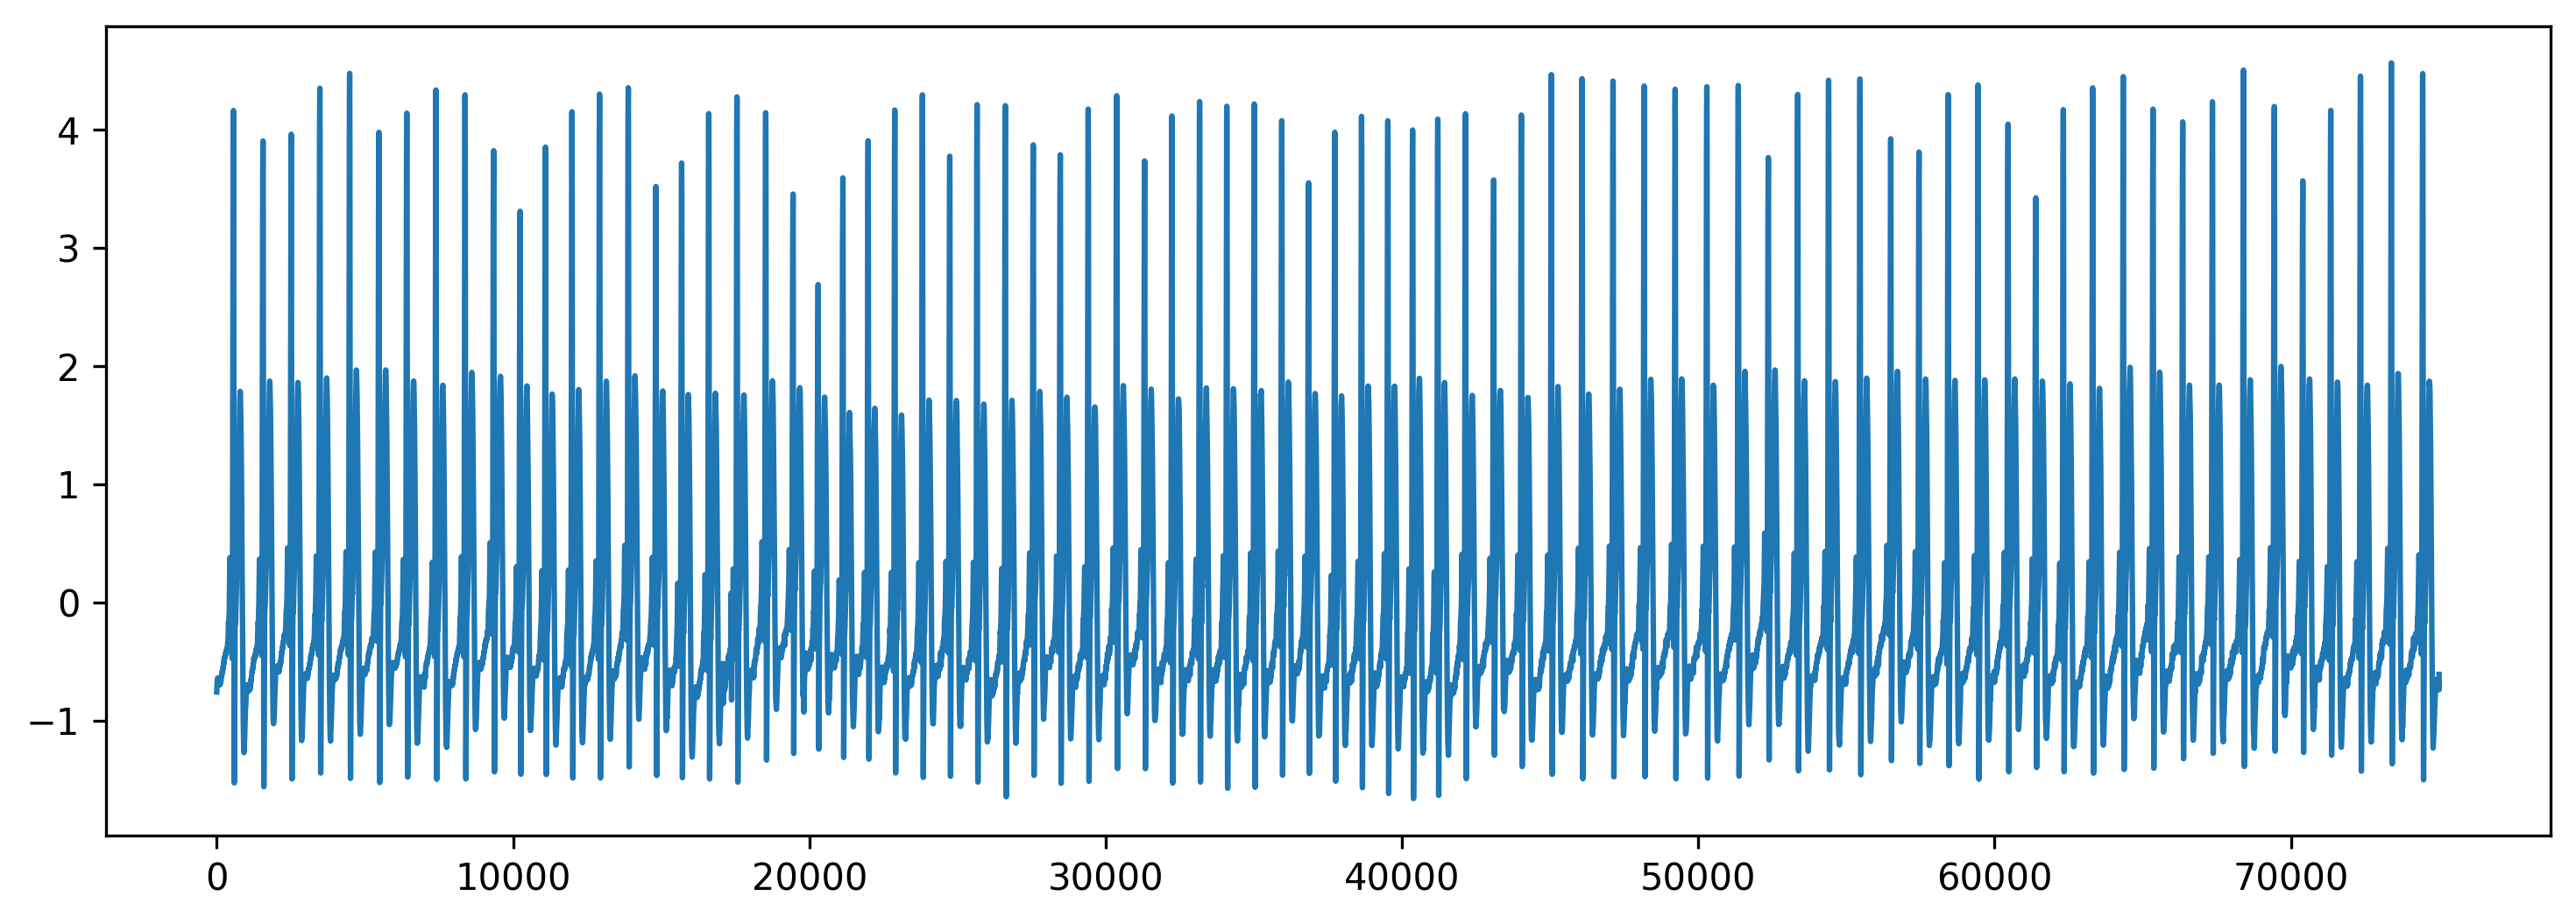

In [769]:
data = hp.get_data('/content/original_ECG_10.csv')

plt.figure(figsize=(12,4))
plt.plot(data)
plt.show()

heart rates:  [ 128.20512821   65.50218341  234.375        25.55366269  125.
   66.07929515  234.375        84.26966292   41.43646409  123.96694215
   66.66666667  230.76923077   26.92998205  127.11864407   64.93506494
  241.93548387   25.29510961  125.           65.78947368  230.76923077
   26.17801047  121.95121951   66.37168142  234.375        28.30188679
  123.96694215   65.2173913   250.           26.26970228  123.96694215
   64.93506494  241.93548387   87.20930233 1500.           38.65979381
  126.05042017   65.50218341  234.375        27.07581227  125.
   65.2173913   254.23728814   30.99173554  123.96694215   65.78947368
  254.23728814   33.48214286  126.05042017   66.66666667  238.0952381
   30.67484663  129.31034483   65.50218341  241.93548387   28.68068834
  126.05042017   65.78947368  238.0952381    26.83363148  126.05042017
   66.96428571  223.88059701   28.84615385  122.95081967   64.93506494
  277.77777778   81.52173913   55.35055351  118.11023622   66.66666667
  241.935

<ipython-input-770-53e8ba367caa>:15: UserWarning: Warning: converting a masked element to nan.
  print('%s: %f' %(measure, m[measure]))


<Figure size 3600x1200 with 0 Axes>

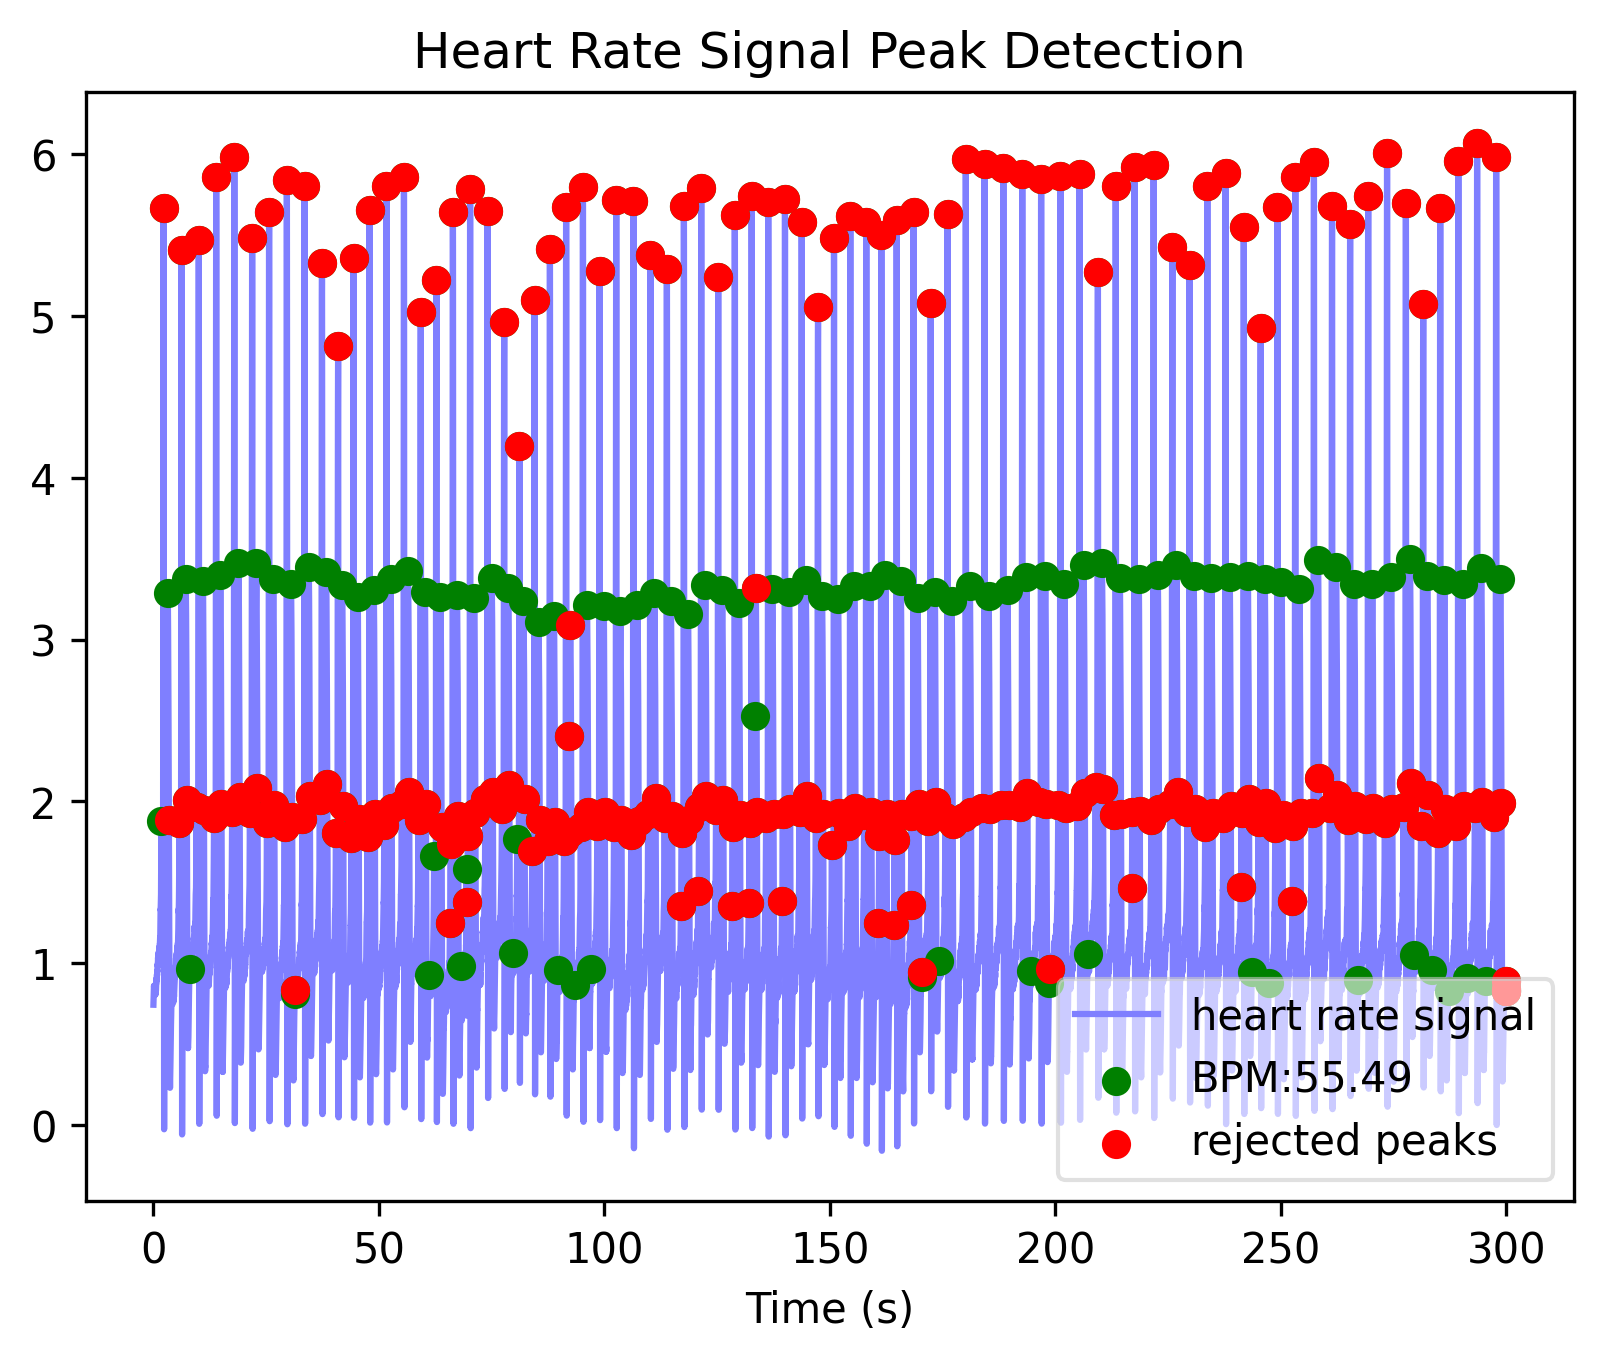

In [770]:
#run analysis
wd, m = hp.process(data[1:], sample_rate)

#visualise in plot of custom size
plt.figure(figsize=(12,4))
hp.plotter(wd, m)
#print(len(wd['hr']))
#print(wd.keys())
#print(wd['RR_list'])
#heart rates
hrs = 60000/wd['RR_list']
print("heart rates: ",hrs)
#display computed measures
for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))

In [771]:

df2 = pd.DataFrame({ "Heart Rate" : np.array(hrs)})
df2.to_csv("hr_original_10.csv", index=False)


In [772]:
# data = hp.get_data('original_ECG_15.csv')

# plt.figure(figsize=(12,4))
# plt.plot(data)
# plt.show()

heart rates:  [ 128.20512821   65.50218341  234.375        25.55366269  125.
   66.07929515  234.375        84.26966292   41.43646409  123.96694215
   66.66666667  230.76923077   26.92998205  127.11864407   64.93506494
  241.93548387   25.29510961  125.           65.78947368  230.76923077
   26.17801047  121.95121951   66.37168142  234.375        28.30188679
  123.96694215   65.2173913   250.           26.26970228  123.96694215
   64.93506494  241.93548387   87.20930233 1500.           38.65979381
  126.05042017   65.50218341  234.375        27.07581227  125.
   65.2173913   254.23728814   30.99173554  123.96694215   65.78947368
  254.23728814   33.48214286  126.05042017   66.66666667  238.0952381
   30.67484663  129.31034483   65.50218341  241.93548387   28.68068834
  126.05042017   65.78947368  238.0952381    26.83363148  126.05042017
   66.96428571  223.88059701   28.84615385  122.95081967   64.93506494
  277.77777778   81.52173913   55.35055351  118.11023622   66.66666667
  241.935

<ipython-input-773-53e8ba367caa>:15: UserWarning: Warning: converting a masked element to nan.
  print('%s: %f' %(measure, m[measure]))


<Figure size 3600x1200 with 0 Axes>

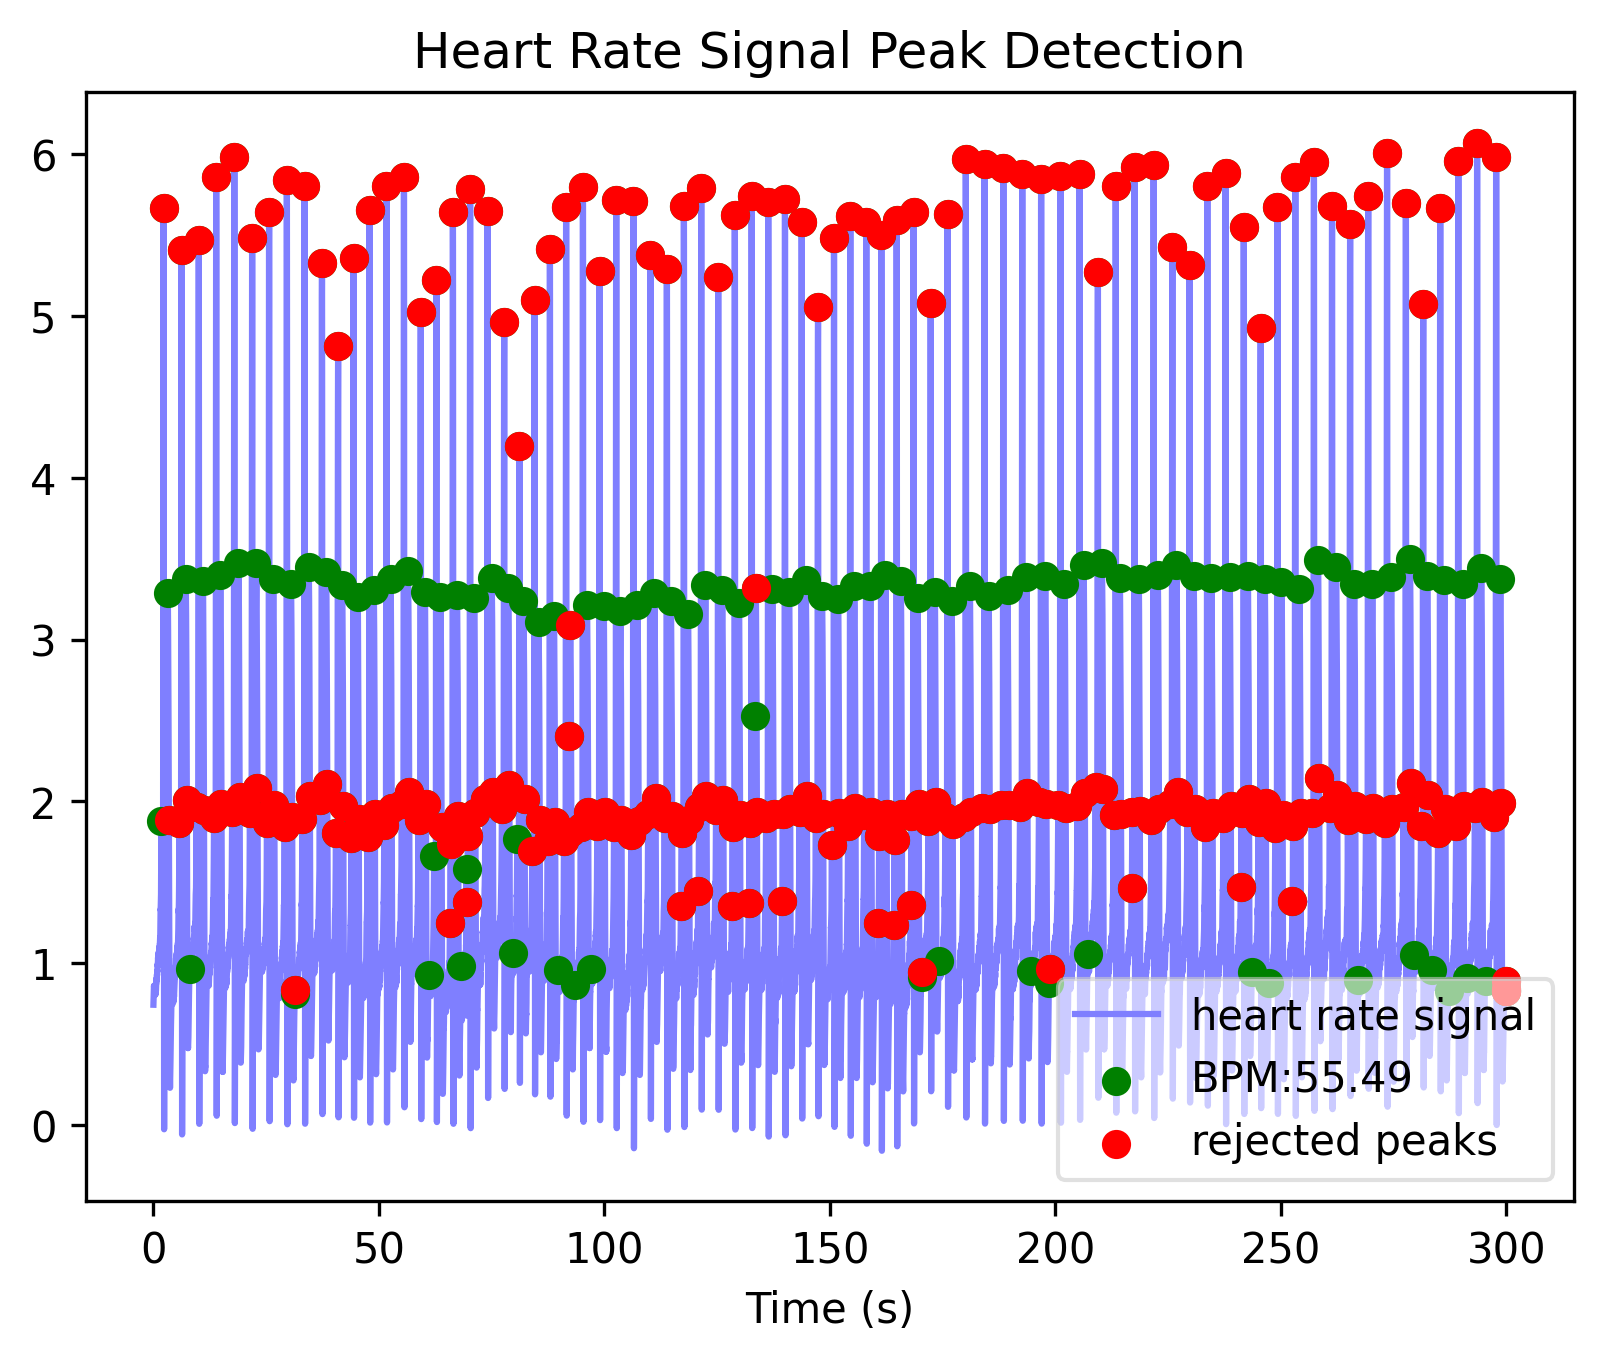

In [773]:
#run analysis
wd, m = hp.process(data[1:], sample_rate)

#visualise in plot of custom size
plt.figure(figsize=(12,4))
hp.plotter(wd, m)
#print(len(wd['hr']))
#print(wd.keys())
#print(wd['RR_list'])
#heart rates
hrs = 60000/wd['RR_list']
print("heart rates: ",hrs)
#display computed measures
for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))

In [774]:

# df2 = pd.DataFrame({ "Heart Rate" : np.array(hrs)})
# df2.to_csv("/content/drive/MyDrive/ECG_data/hr_original_12.csv", index=False)


In [775]:
# data = hp.get_data('/content/drive/MyDrive/ECG_data/hr_original_10.csv')

In [776]:
for i in range(len(data)):
  if data[i]>500:
    data[i]=data[i]/10

In [777]:
# import pandas as pd
# import numpy as np
# df2 = pd.DataFrame({ "Heart Rate" : np.array(data)})
# df2.to_csv("/content/drive/MyDrive/ECG_data/hr_original_10.csv", index=False)


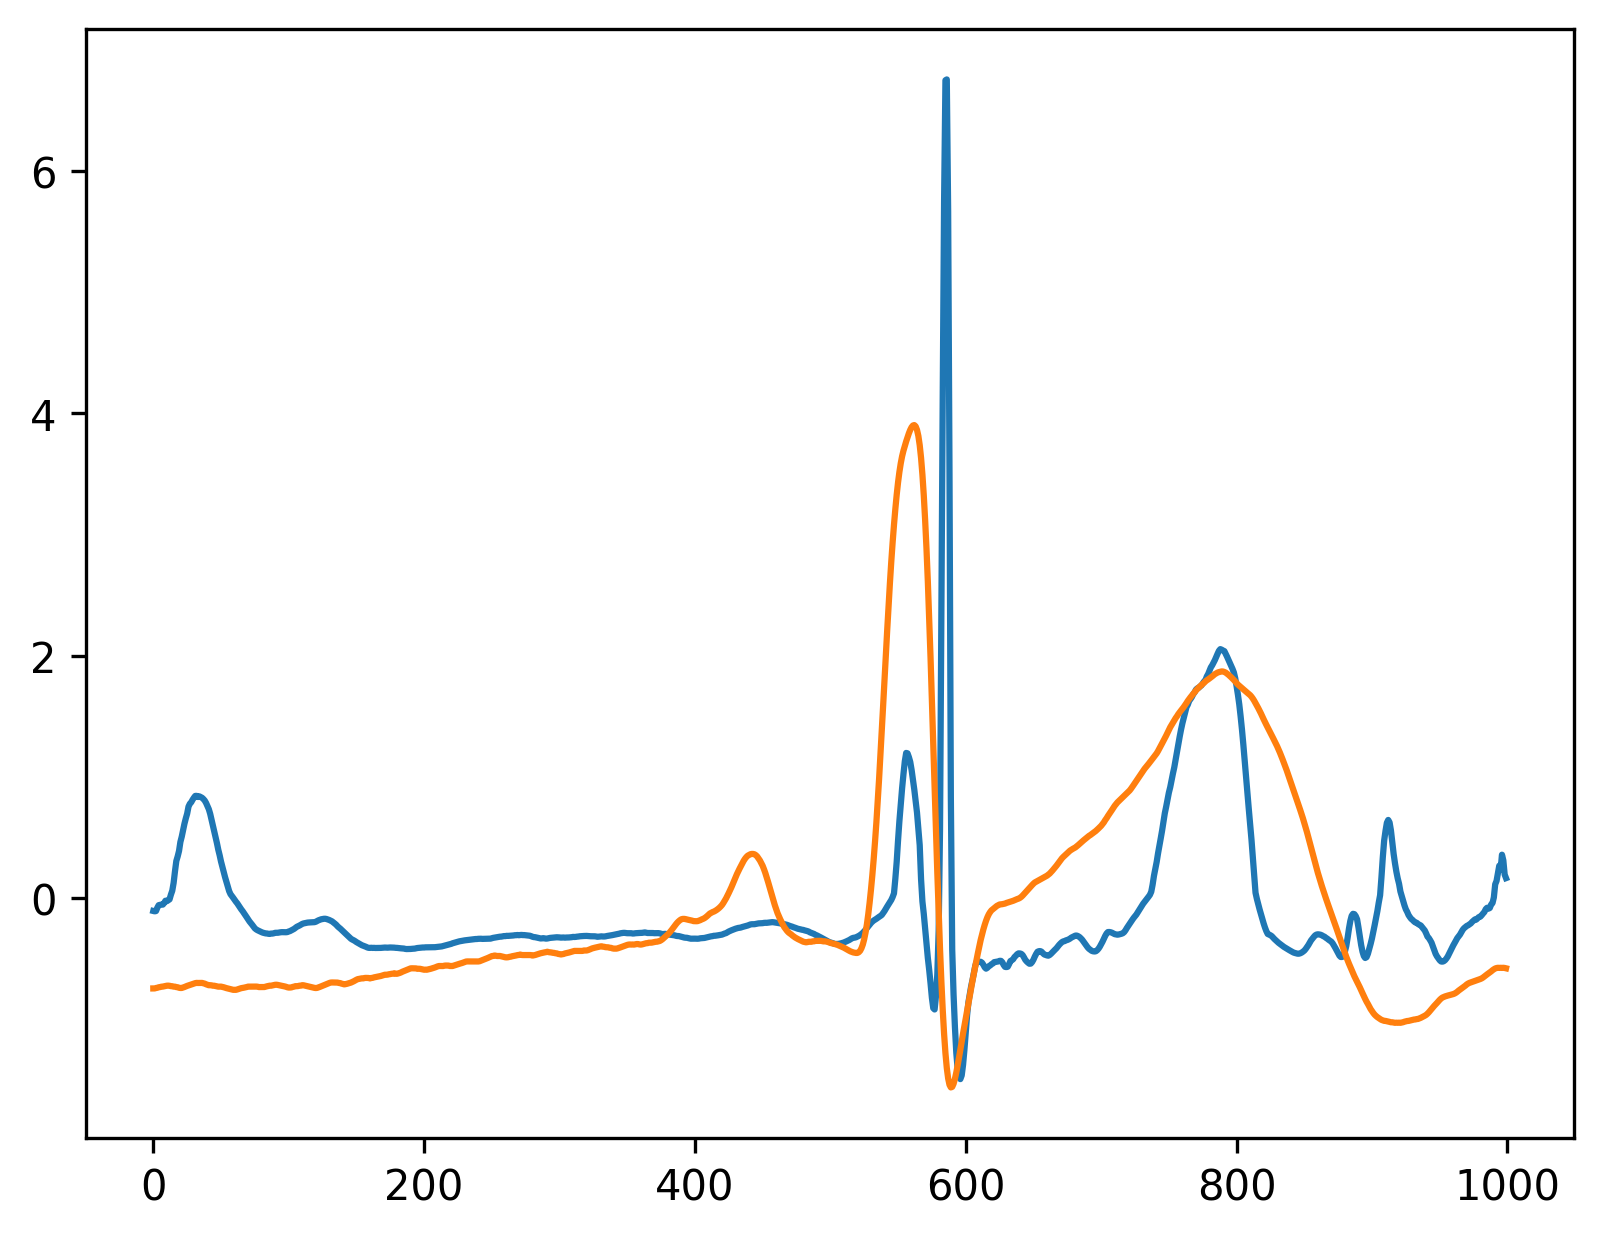

In [778]:
plt.plot(x_g_AB[1])
plt.plot(y_test[1])

In [779]:
#X_test_in = []
#x_g_AB_in = []
#inverse differencing
#for i in range(len(X_test)):
#  X_test_in.append((np.concatenate(([X_test[i][0]], X_test[i])).cumsum())[:x_g_AB.shape[1]])
#  x_g_AB_in.append((np.concatenate(([x_g_AB[i][0]], x_g_AB[i])).cumsum())[:x_g_AB.shape[1]])

In [780]:
# len(x_g_AB_in)

In [781]:
# len(x_g_AB_in[0])

In [782]:
# x_g_AB = np.array(x_g_AB_in).reshape(x_g_AB.shape[0],x_g_AB.shape[1],1)
# X_test = np.array(X_test_in).reshape(X_test.shape[0],X_test.shape[1],1)

In [783]:
def smooth(x,window_len=7,window='hanning'):
    """smooth the data using a window with requested size.

    This method is based on the convolution of a scaled window with the signal.
    The signal is prepared by introducing reflected copies of the signal
    (with the window size) in both ends so that transient parts are minimized
    in the begining and end part of the output signal.

    input:
        x: the input signal
        window_len: the dimension of the smoothing window; should be an odd integer
        window: the type of window from 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'
            flat window will produce a moving average smoothing.

    output:
        the smoothed signal

    example:

    t=linspace(-2,2,0.1)
    x=sin(t)+randn(len(t))*0.1
    y=smooth(x)

    see also:

    numpy.hanning, numpy.hamming, numpy.bartlett, numpy.blackman, numpy.convolve
    scipy.signal.lfilter

    TODO: the window parameter could be the window itself if an array instead of a string
    NOTE: length(output) != length(input), to correct this: return y[(window_len/2-1):-(window_len/2)] instead of just y.
    """

    if window_len<3:
        return x

    s=np.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]
    #print(len(s))
    if window == 'flat': #moving average
        w=np.ones(window_len,'d')
    else:
        w=eval('np.'+window+'(window_len)')

    y=np.convolve(w/w.sum(),s,mode='valid')
    return y


In [784]:
x_g_AB_reshaped = x_g_AB.reshape(x_g_AB.shape[0],x_g_AB.shape[1])

In [785]:
x_g_AB_reshaped.shape

(75, 1000)

In [786]:
x_g_AB_smoothed = []
for i in range(len(x_g_AB_reshaped)):
  smoothed = smooth(x_g_AB_reshaped[i])
  x_g_AB_smoothed.append(smoothed[:len(x_g_AB_reshaped[i])])


In [787]:
#          Testing functions
#################################################################################
def rmse(targets, predictions):
    return np.sqrt(np.mean((targets-predictions)**2))


def prd(targets, predictions):
    s1 = np.sum((targets-predictions)**2)
    s2 = np.sum(targets**2)
    return np.sqrt(s1 / s2 * 100)


def mmd(targets, predictions):
    mmd_stat = MMDStatistic(400, 400)
    sample_target = torch.from_numpy(targets.numpy().reshape((400,1)))
    sample_pred = torch.from_numpy(predictions.numpy().reshape((400,1)))

    stat = mmd_stat(sample_target, sample_pred, [1.])
    return(stat.item())


In [788]:
x_g_AB_smoothed = np.array(x_g_AB_smoothed)
x_g_AB_smoothed = x_g_AB_smoothed.reshape(x_g_AB_smoothed.shape[0],x_g_AB_smoothed.shape[1],1)

In [789]:
y_test.shape

(75, 1000, 1)

In [790]:
x_g_AB_smoothed.shape

(75, 1000, 1)

In [791]:
#for i in range(len(x_g_AB)):
rmse_arr = rmse(y_test,x_g_AB)
print(rmse_arr)
rmse_smoothed = rmse(y_test,x_g_AB_smoothed)
print("smoothed",rmse_smoothed)

1.0544900094613474
smoothed 1.0506246228391443


In [792]:
rmse_all =[]
rmse_all_smoothened =[]
for i in range(len(x_g_AB)):
  rmse_all.append(rmse(y_test[i],x_g_AB[i]))
  rmse_all_smoothened.append(rmse(y_test[i],x_g_AB_smoothed[i]))

rmse_all_mean = np.array(rmse_all).mean()
print(rmse_all_mean)
rmse_all_smoothed_mean = np.array(rmse_all_smoothened).mean()
print("smoothed",rmse_all_smoothed_mean)

1.0507246979802025
smoothed 1.0467139992672627


In [793]:

prd_arr = prd(y_test,x_g_AB)
print(prd_arr)
prd_arr_smoothed = prd(y_test,x_g_AB_smoothed)
print("smoothed",prd_arr_smoothed)

10.605449296246793
smoothed 10.566573478112579


In [794]:
from sklearn.metrics import mean_absolute_error
mae_arr = mean_absolute_error(y_test.flatten(),x_g_AB.flatten())
print(mae_arr)
mae_arr_smoothed = mean_absolute_error(y_test.flatten(),x_g_AB_smoothed.flatten())
print("smoothed",mae_arr_smoothed)

0.6450734995720205
smoothed 0.6463003856431044


In [795]:
def detect_peaks(ecg_signal, threshold=0.3, qrs_filter=None):
    '''
    Peak detection algorithm using cross corrrelation and threshold
    '''
    if qrs_filter is None:
        # create default qrs filter, which is just a part of the sine function
        t = np.linspace(1.5 * np.pi, 3.5 * np.pi, 15)
        qrs_filter = np.sin(t)

    # normalize data
    ecg_signal = (ecg_signal - ecg_signal.mean()) / ecg_signal.std()

    # calculate cross correlation
    similarity = np.correlate(ecg_signal, qrs_filter, mode="same")
    similarity = similarity / np.max(similarity)

    # return peaks (values in ms) using threshold
    return ecg_signal[similarity > threshold].index, similarity

In [796]:
def group_peaks(p, threshold=5):
    '''
    The peak detection algorithm finds multiple peaks for each QRS complex.
    Here we group collections of peaks that are very near (within threshold) and we take the median index
    '''
    # initialize output
    output = np.empty(0)

    # label groups of sample that belong to the same peak
    peak_groups, num_groups = label(np.diff(p) < threshold)

    # iterate through groups and take the mean as peak index
    for i in np.unique(peak_groups)[1:]:
        peak_group = p[np.where(peak_groups == i)]
        output = np.append(output, np.median(peak_group))
    return output

In [797]:
import pandas as pd
df = pd.DataFrame(x_g_AB.flatten(), columns = ['ECG'])
df2 = pd.DataFrame(X_test.flatten(), columns = ['SCG'])
df3 = pd.DataFrame(y_test.flatten(), columns = ['ECG_orig'])
#df['column_name']=pd.Series(x_g_AB.flatten())

In [798]:
# n_samples = f.getNSamples()[0]

# # Extract the signal data and flatten it
# signal_data = f.readSignal(0).flatten()

# # Close the file
# f.close()

In [799]:
!pip install wfdb

In [800]:
import wfdb
from wfdb import processing

In [801]:
# to be used for wsdb to edf conversion and reading data using wsdb
import wfdb
from google.colab import files
fileName_str
record = wfdb.rdrecord('b001', pn_dir='cebsdb')

In [802]:
# # Get the number of channels and samples
# n_channels = f.signals_in_file
# n_samples = f.getNSamples()[0]

# # Extract the signal data and flatten it
# signal_data = f.readSignal(0).flatten()

# # Close the file
# f.close()

In [803]:
record.p_signal[0]

array([ 0.16297957,  0.18371695,  0.52520144, -0.18313714])

In [804]:
# qrs = codeFn(ecg_signal, fs)

In [805]:

# Demo 19 - Use the GQRS detection algorithm and correct the peaks

def peaks_hr(sig, peak_inds, fs, title, figsize=(20, 10), saveto=None):
    "Plot a signal with its peaks and heart rate"
    # Calculate heart rate
    hrs = processing.hr.compute_hr(sig_len=sig.shape[0], qrs_inds=peak_inds, fs=fs)
    print(hrs)
    N = sig.shape[0]

    fig, ax_left = plt.subplots(figsize=figsize)
    ax_right = ax_left.twinx()

    ax_left.plot(sig, color='#3979f0', label='Signal')
    ax_left.plot(peak_inds, sig[peak_inds], 'rx', marker='x',
                 color='#8b0000', label='Peak', markersize=12)
    ax_right.plot(np.arange(N), hrs, label='Heart rate', color='m', linewidth=2)

    ax_left.set_title(title)

    ax_left.set_xlabel('Time (ms)')
    ax_left.set_ylabel('ECG (mV)', color='#3979f0')
    ax_right.set_ylabel('Heart rate (bpm)', color='m')
    # Make the y-axis label, ticks and tick labels match the line color.
    ax_left.tick_params('y', colors='#3979f0')
    ax_right.tick_params('y', colors='m')
    if saveto is not None:
        plt.savefig(saveto, dpi=600)
    plt.show()
    return hrs



In [806]:
# t = np.arange(len(ecg_signal)) / fs
# plt.plot(t, ecg_signal)
# plt.plot(qrs/fs, ecg_signal[qrs], 'ro')
# plt.xlabel('Time (s)')
# plt.ylabel('ECG Amplitude')
# plt.show()

[     nan      nan      nan ... 65.30257 65.30257 65.30257]


<ipython-input-805-235016946d19>:14: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "rx" (-> marker='x'). The keyword argument will take precedence.
  ax_left.plot(peak_inds, sig[peak_inds], 'rx', marker='x',
<ipython-input-805-235016946d19>:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "rx" (-> color='r'). The keyword argument will take precedence.
  ax_left.plot(peak_inds, sig[peak_inds], 'rx', marker='x',


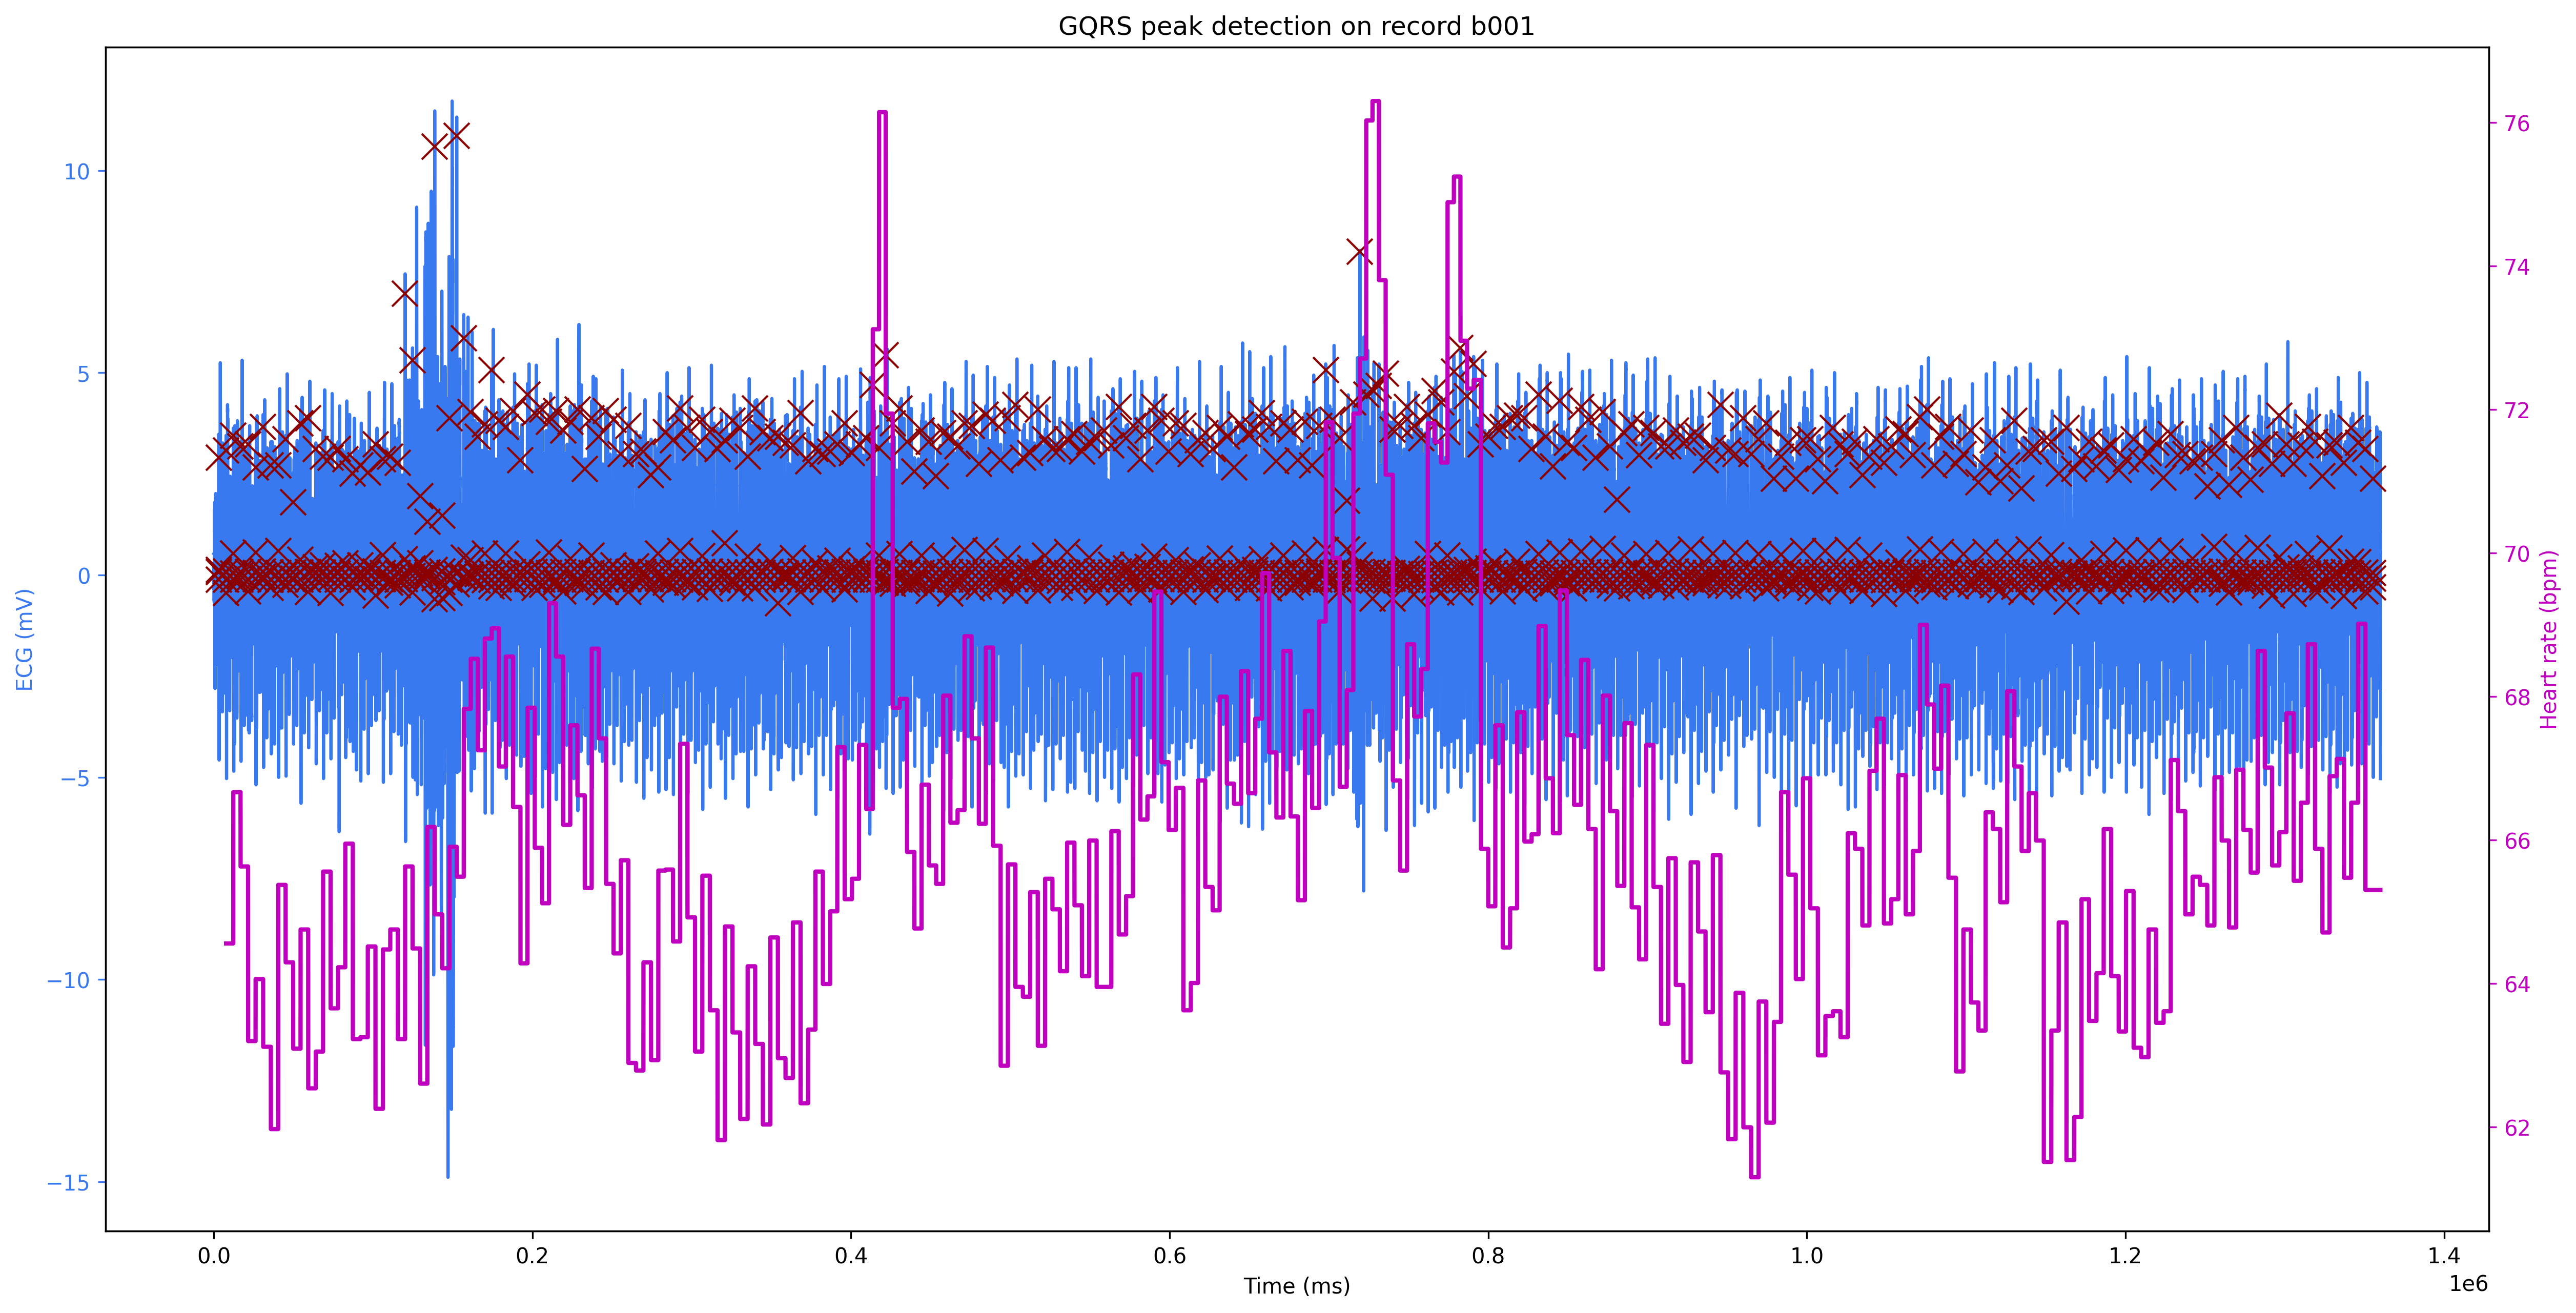

Corrected GQRS detected peak indices: [3270, 7916, 12419, 16987, 21735, 26421, 31171, 36014, 40602, 45266, 50022, 54655, 59451, 64212, 68789, 73501, 78172, 82719, 87465, 92205, 96859, 101676, 106332, 110963, 115709, 120280, 124929, 129717, 134266, 138870, 143544, 148097, 152684, 157102, 161481, 165941, 170302, 174651, 179127, 183506, 188017, 192687, 197109, 201660, 206265, 210597, 214970, 219502, 223942, 228443, 233036, 237407, 241853, 246441, 251102, 255665, 260434, 265214, 269880, 274645, 279222, 283794, 288440, 292897, 297516, 302274, 306855, 311569, 316422, 321054, 325790, 330618, 335292, 340040, 344877, 349518, 354281, 359068, 363696, 368504, 373243, 377818, 382504, 387121, 391581, 396182, 400765, 405221, 409737, 413840, 417780, 421948, 426371, 430785, 435342, 439976, 444469, 449037, 453627, 458038, 462565, 467083, 471442, 475889, 480422, 484791, 489339, 494114, 498683, 503373, 508075, 512670, 517420, 522005, 526617, 531292, 535842, 540450, 545132, 549678, 554367, 559059, 563595, 

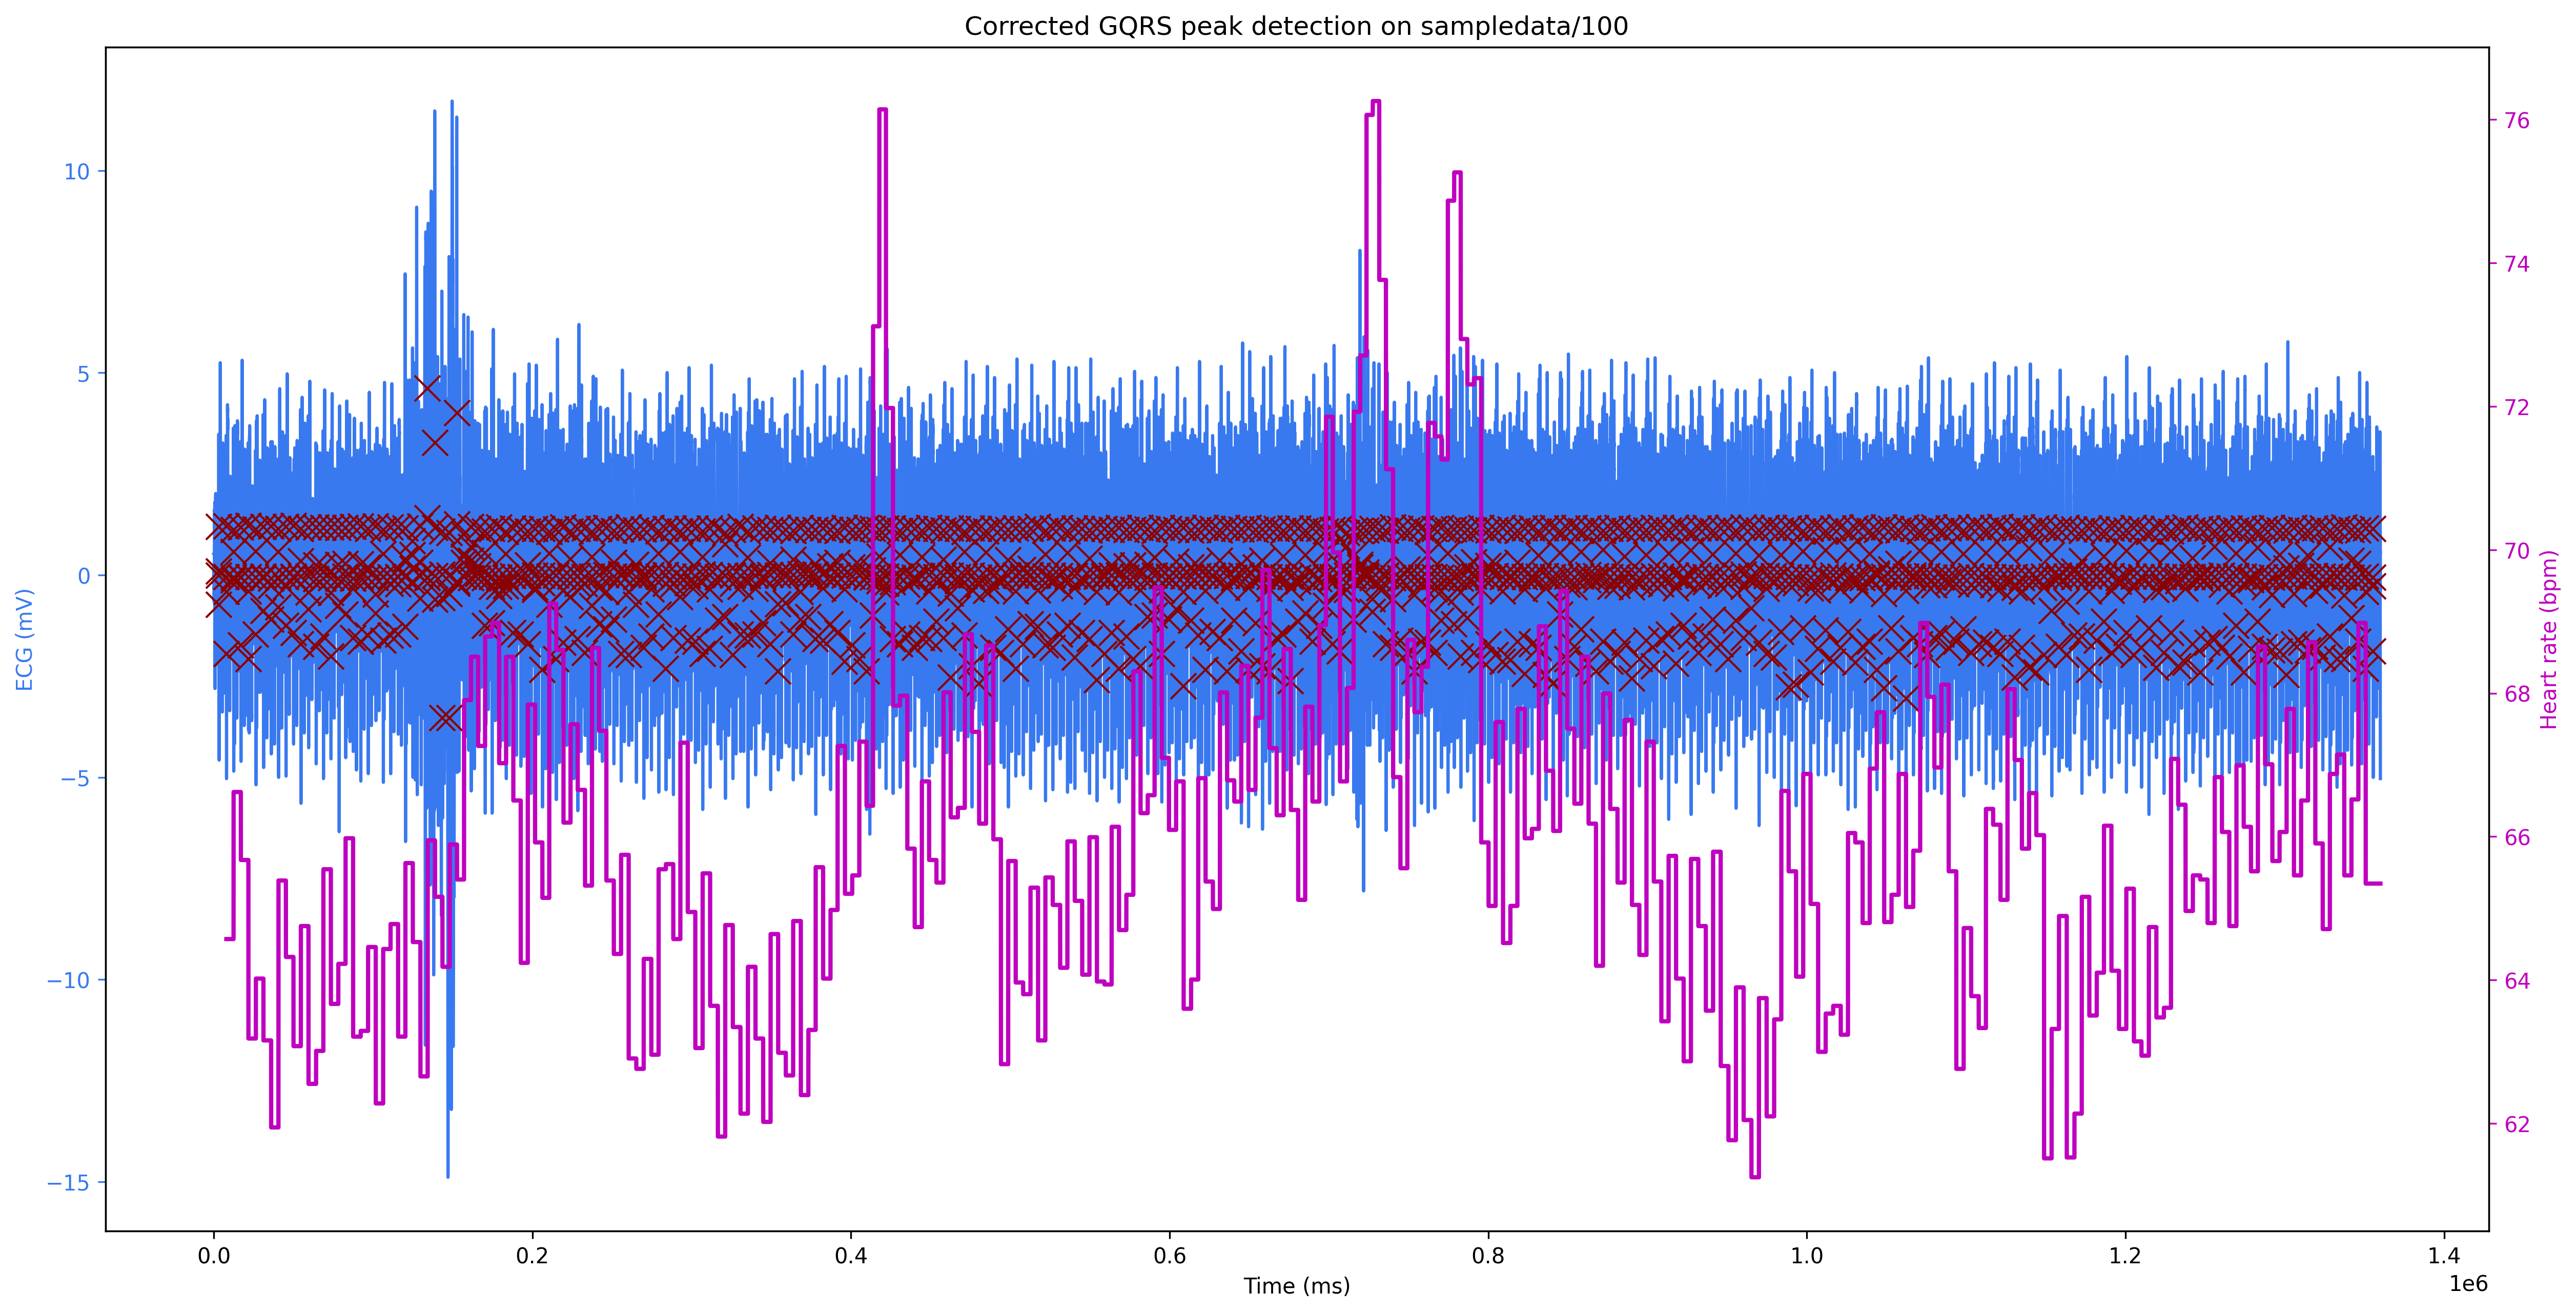

In [807]:
# Load the WFDB record and the physical samples
#record = wfdb.rdrecord('sample-data/100', sampfrom=0, sampto=10000, channels=[0])

# Use the GQRS algorithm to detect QRS locations in the first channel
qrs_inds = processing.qrs.gqrs_detect(sig=record.p_signal[:,0], fs=record.fs)

# Plot results
hrs = peaks_hr(sig=record.p_signal, peak_inds=qrs_inds, fs=record.fs,
         title="GQRS peak detection on record b001")

# Correct the peaks shifting them to local maxima
min_bpm = 20
max_bpm = 230
#min_gap = record.fs * 60 / min_bpm
# Use the maximum possible bpm as the search radius
search_radius = int(record.fs * 60 / max_bpm)
corrected_peak_inds = processing.peaks.correct_peaks(record.p_signal[:,0],
                                                     peak_inds=qrs_inds,
                                                     search_radius=search_radius,
                                                     smooth_window_size=150)

# Display results
print('Corrected GQRS detected peak indices:', sorted(corrected_peak_inds))
hrs = peaks_hr(sig=record.p_signal, peak_inds=sorted(corrected_peak_inds), fs=record.fs,
         title="Corrected GQRS peak detection on sampledata/100")


[      nan       nan       nan ... 151.59172 151.59172 151.59172]


<ipython-input-805-235016946d19>:14: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "rx" (-> marker='x'). The keyword argument will take precedence.
  ax_left.plot(peak_inds, sig[peak_inds], 'rx', marker='x',
<ipython-input-805-235016946d19>:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "rx" (-> color='r'). The keyword argument will take precedence.
  ax_left.plot(peak_inds, sig[peak_inds], 'rx', marker='x',


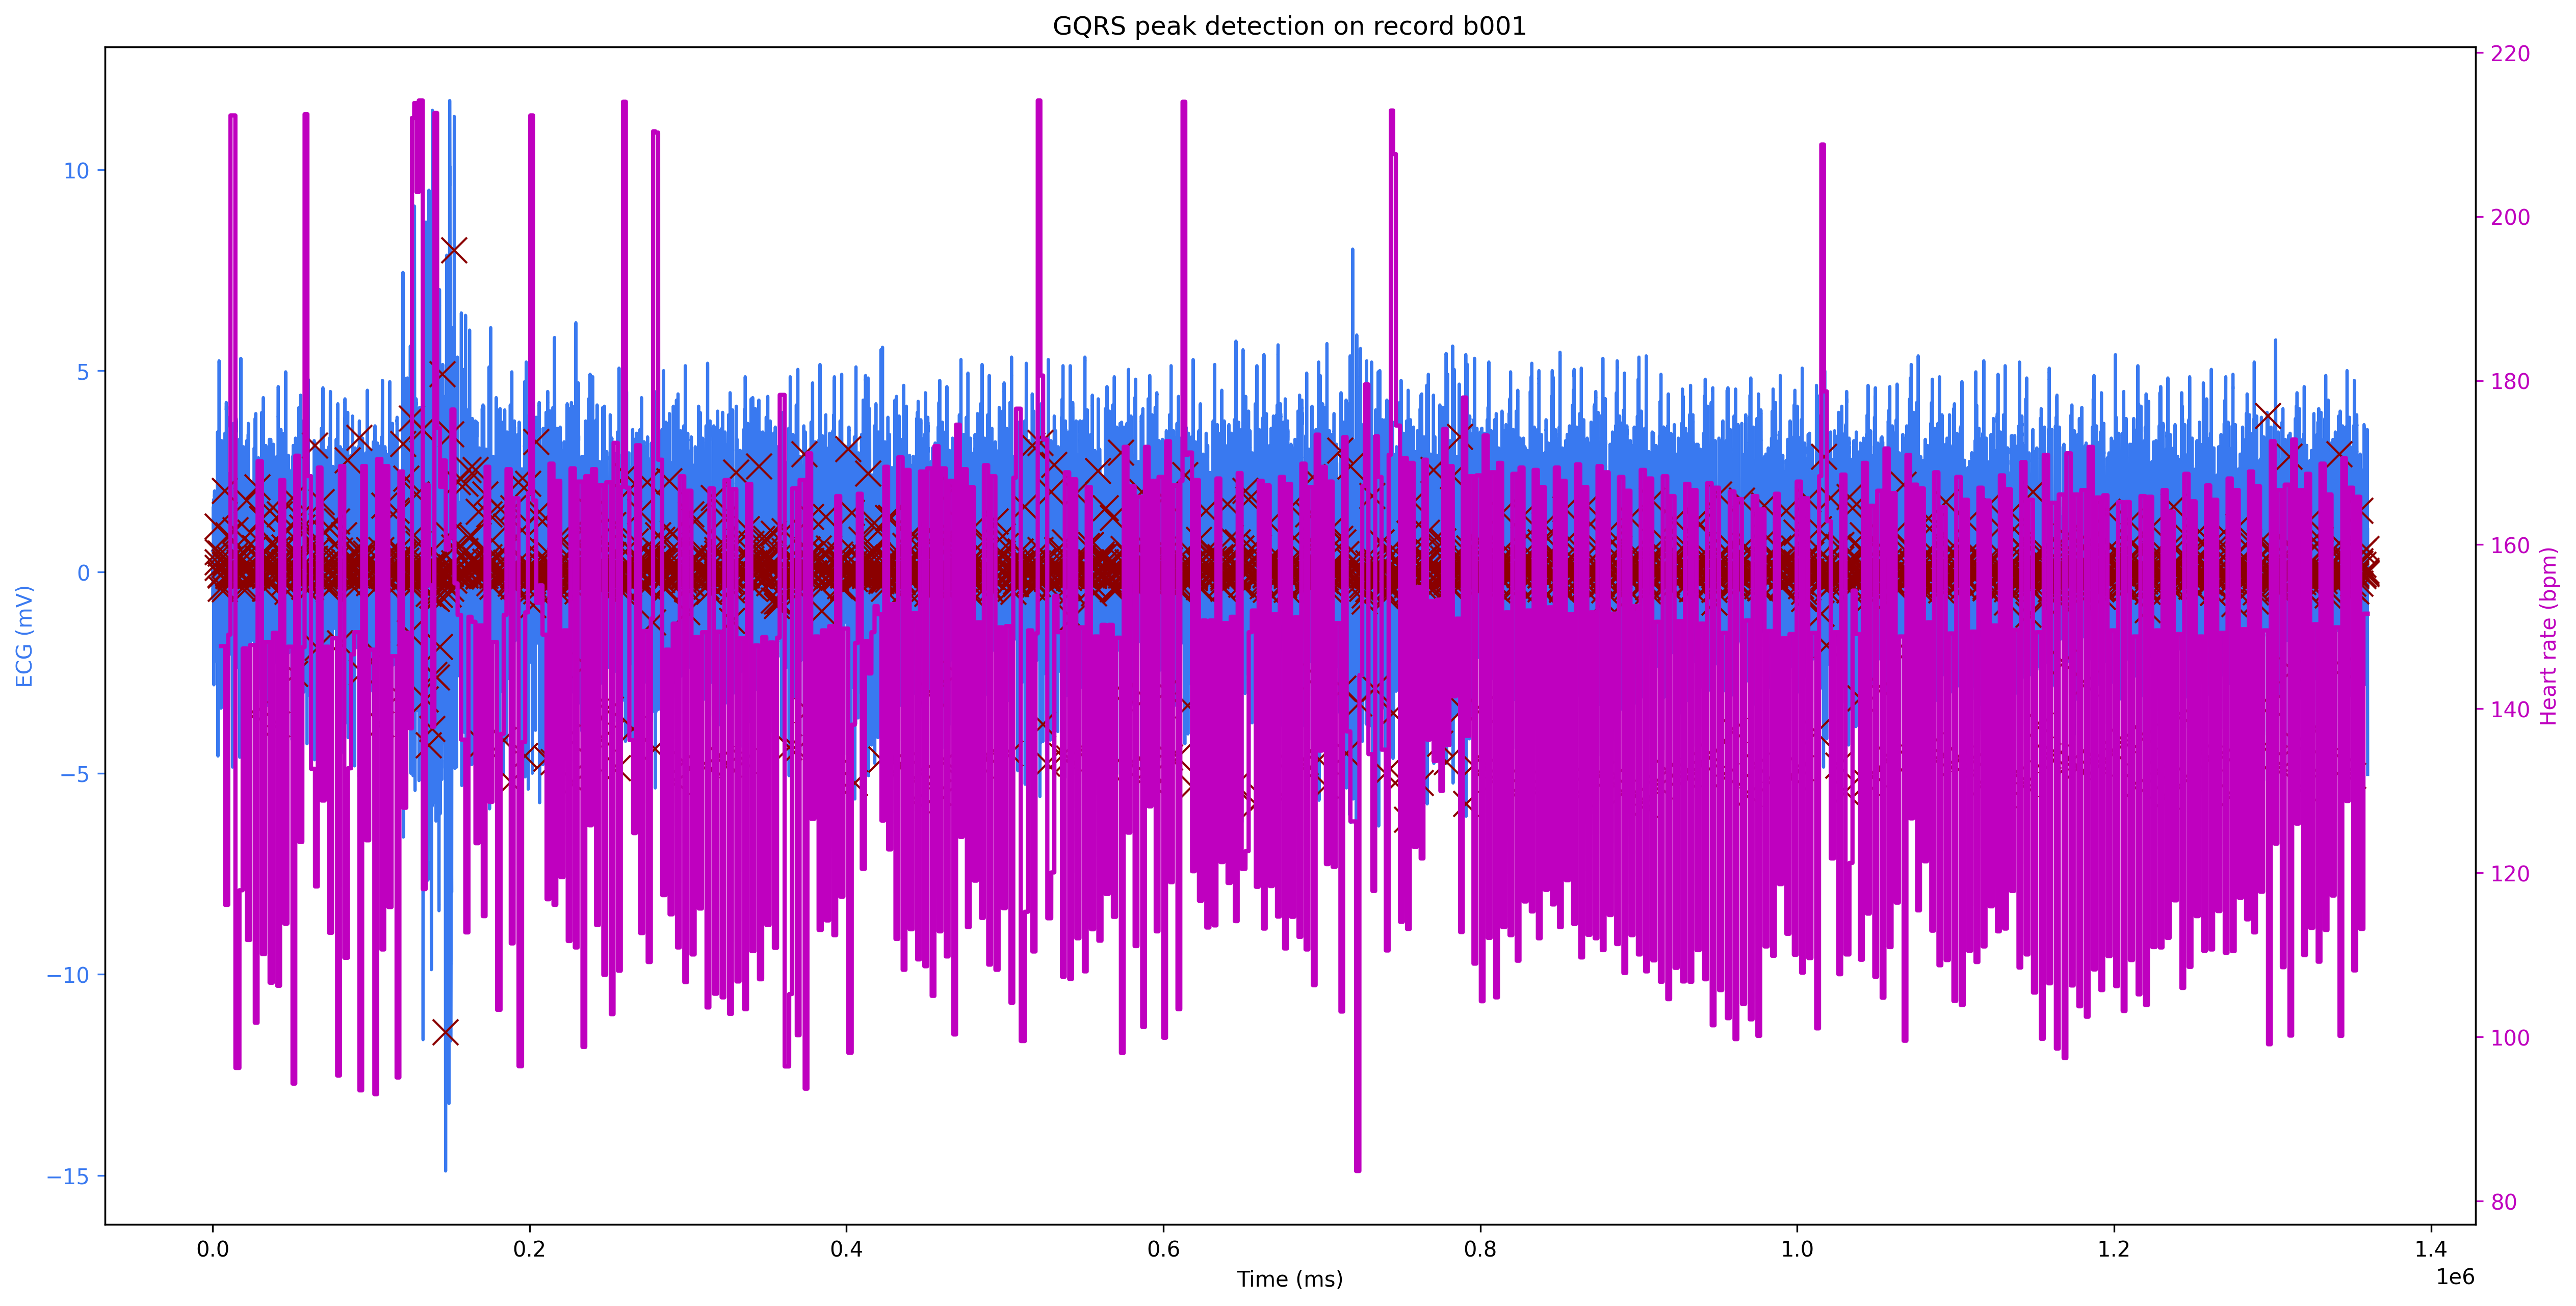

Corrected GQRS detected peak indices: [3365, 5344, 8026, 9983, 9983, 14484, 17103, 19065, 22251, 23784, 26923, 28489, 31282, 33252, 36549, 38069, 40714, 42668, 45374, 47343, 50537, 52102, 54773, 56754, 56754, 59561, 61524, 64743, 66257, 68886, 70876, 73605, 75567, 78713, 80193, 83225, 84797, 87574, 89536, 92733, 94303, 96971, 98935, 101789, 103751, 106876, 108409, 111051, 113040, 116233, 117791, 120376, 122355, 125037, 125037, 126831, 129128, 130234, 132718, 134405, 136338, 138495, 140934, 140934, 143647, 145593, 148194, 149186, 150258, 152802, 154726, 157213, 158164, 161217, 163539, 166037, 167989, 170415, 172347, 174757, 176713, 179649, 181168, 183638, 185577, 188125, 190096, 193209, 194731, 197193, 199182, 201755, 201762, 203722, 206370, 208331, 210694, 212653, 215058, 217028, 219599, 221556, 224050, 225991, 228551, 230489, 233548, 235083, 237517, 239462, 241957, 243890, 246539, 248468, 251198, 253189, 255772, 257712, 257712, 260535, 262490, 265324, 266283, 269984, 271941, 274757, 2

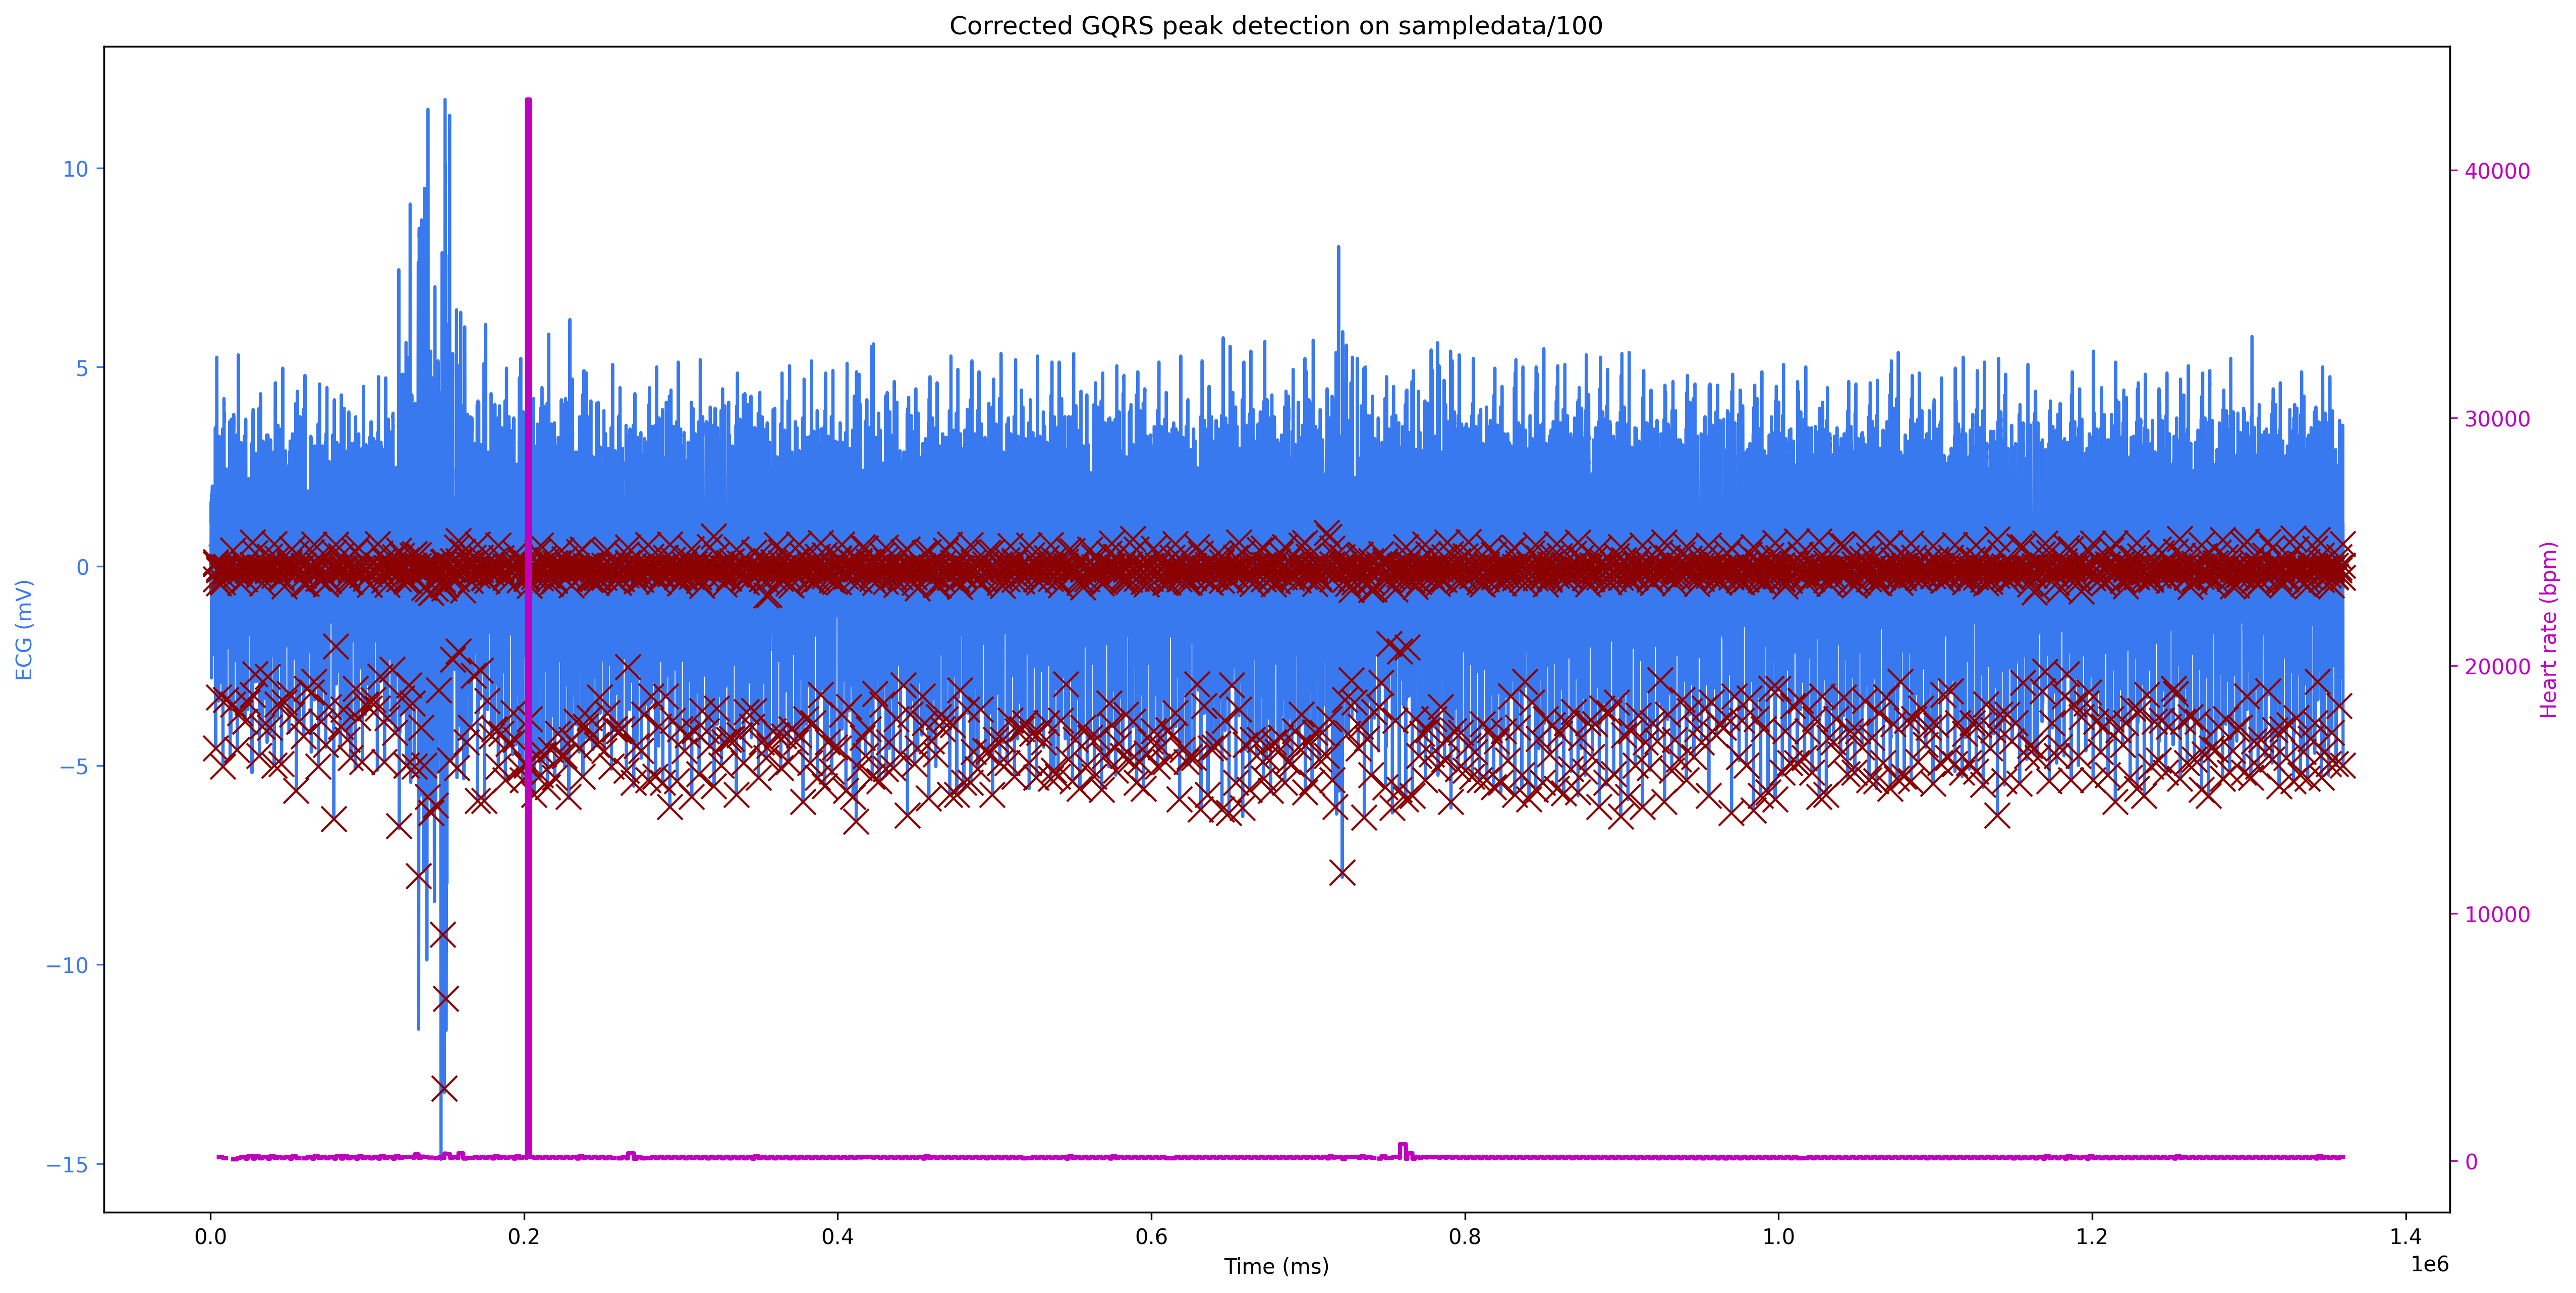

In [808]:
# Load the WFDB record and the physical samples
#record = wfdb.rdrecord('sample-data/100', sampfrom=0, sampto=10000, channels=[0])

# Use the GQRS algorithm to detect QRS locations in the first channel
qrs_inds = processing.qrs.gqrs_detect(sig=record.p_signal[:,3], fs=record.fs)

# Plot results
hrs_scg = peaks_hr(sig=record.p_signal, peak_inds=qrs_inds, fs=record.fs,
         title="GQRS peak detection on record b001")

# Correct the peaks shifting them to local maxima
min_bpm = 20
max_bpm = 230
#min_gap = record.fs * 60 / min_bpm
# Use the maximum possible bpm as the search radius
search_radius = int(record.fs * 60 / max_bpm)
corrected_peak_inds = processing.peaks.correct_peaks(record.p_signal[:,3],
                                                     peak_inds=qrs_inds,
                                                     search_radius=search_radius,
                                                     smooth_window_size=150)

# Display results
print('Corrected GQRS detected peak indices:', sorted(corrected_peak_inds))
hrs_scg = peaks_hr(sig=record.p_signal, peak_inds=sorted(corrected_peak_inds), fs=record.fs,
         title="Corrected GQRS peak detection on sampledata/100")


In [809]:
len(hrs)
hrs = hrs[~np.isnan(hrs)]
hrs=hrs[hrs<160]
#hrs=hrs[hrs>100]
print(len(hrs))

1352133


In [810]:
len(hrs_scg)

hrs_scg = hrs_scg[~np.isnan(hrs_scg)]
hrs_scg=hrs_scg[hrs_scg<160]
#hrs_scg=hrs_scg[hrs_scg>100]
print(len(hrs_scg))

1235247


/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


Text(0.5, 0, 'ECG heart rate')

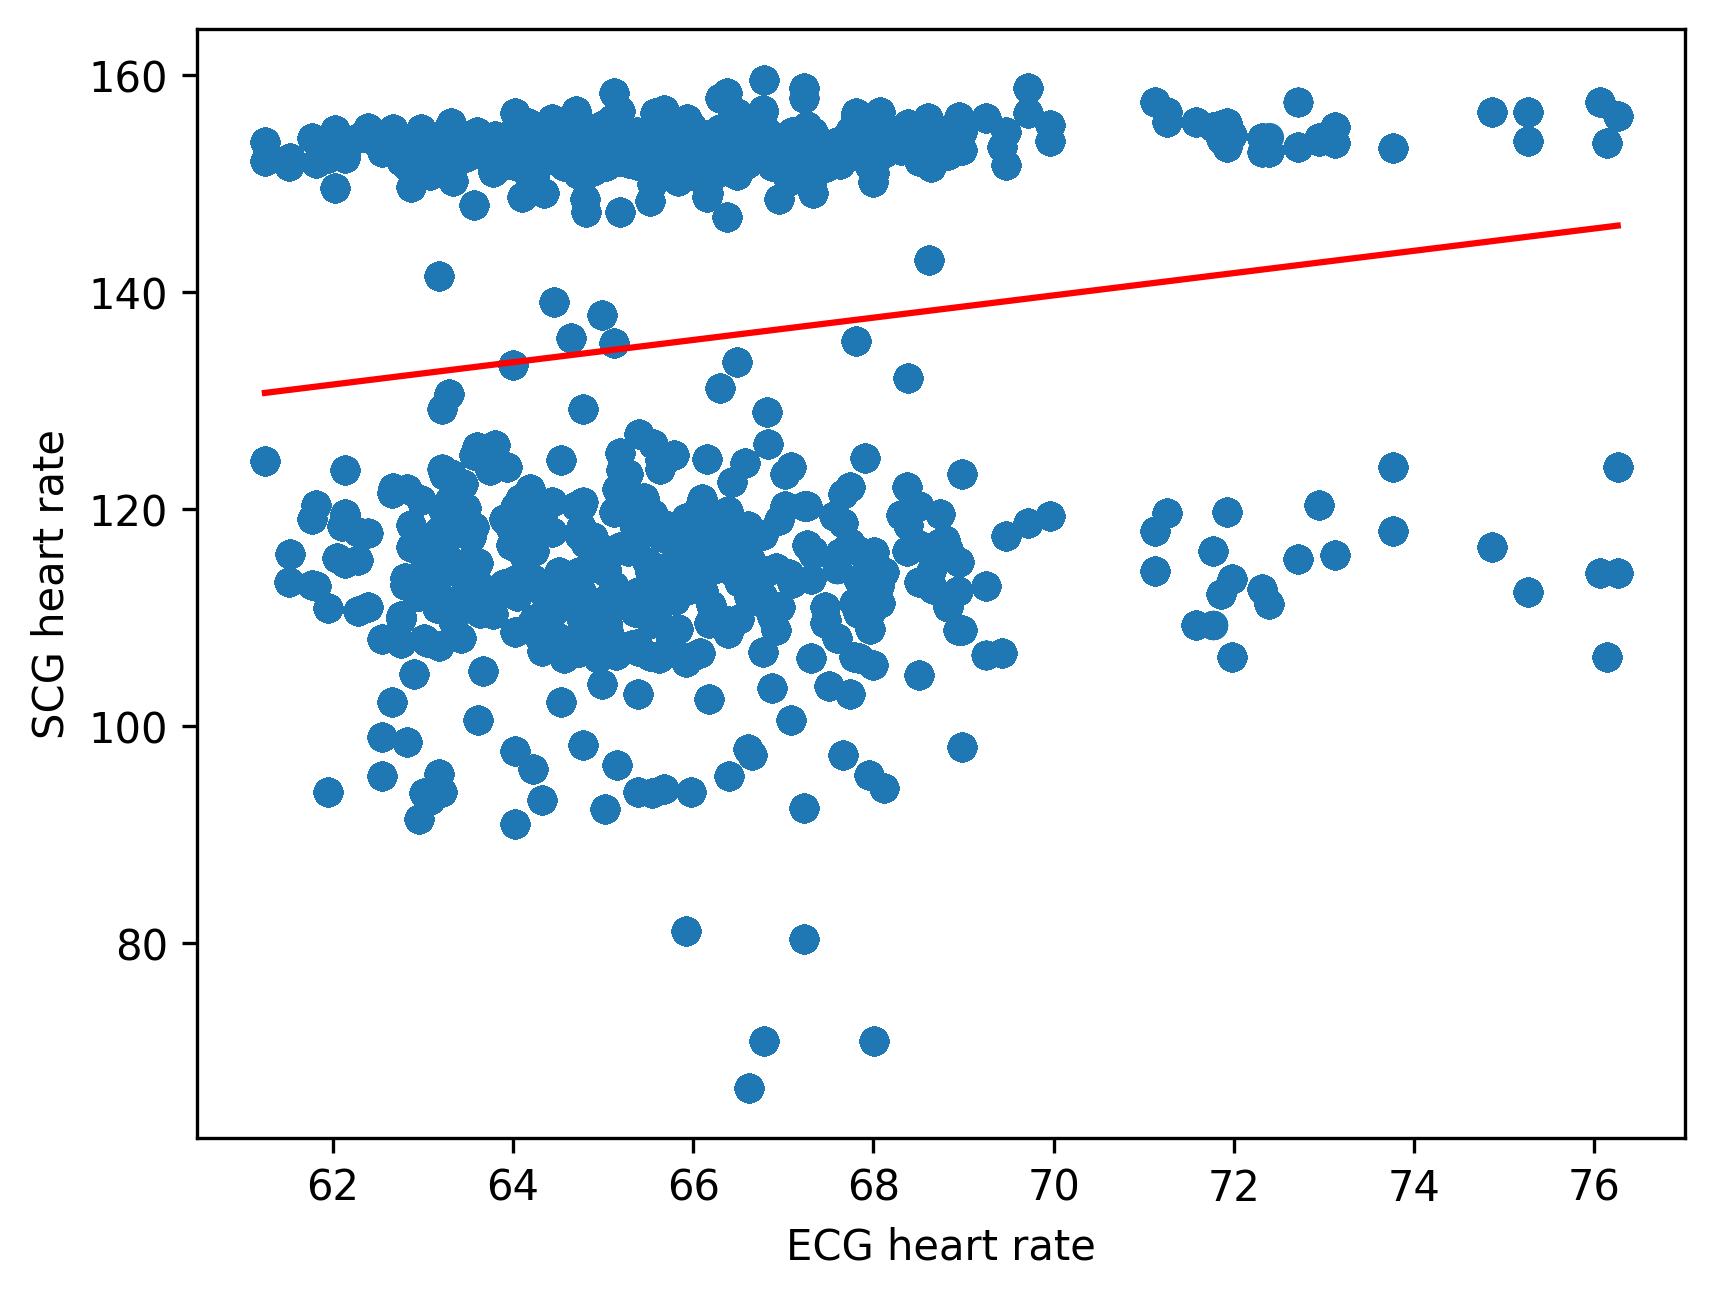

In [811]:
# plotting the data
plt.scatter(hrs[:len(hrs_scg)], hrs_scg)

# This will fit the best line into the graph
plt.plot(np.unique(hrs), np.poly1d(np.polyfit(hrs[:len(hrs_scg)], hrs_scg, 1))
         (np.unique(hrs)), color='red')
plt.ylabel("SCG heart rate")
plt.xlabel("ECG heart rate")

In [812]:
!pip install pyhrv

In [813]:
# detect peaks
print(len(df.ECG))
print(len(df2.SCG))
print(len(df3.ECG_orig))
peaks_ecg_pred, similarity = detect_peaks(df.ECG, threshold=0.3)
peaks_scg, similarity = detect_peaks(df2.SCG, threshold=0.3)
peaks_ecg, similarity = detect_peaks(df3.ECG_orig, threshold=0.3)

print(len(peaks_ecg_pred))
print(len(peaks_scg))
print(len(peaks_ecg))
# group peaks so we get a single peak per beat (hopefully)

from scipy.ndimage import label
grouped_peaks_ecg_pred = group_peaks(peaks_ecg_pred)
grouped_peaks_scg = group_peaks(peaks_scg)
grouped_peaks_ecg = group_peaks(peaks_ecg)

print(len(grouped_peaks_ecg_pred))
print(len(grouped_peaks_scg))
print(len(grouped_peaks_ecg))
# RR-intervals are the differences between successive peaks
rr_ecg_pred = np.diff(grouped_peaks_ecg_pred)
rr_scg = np.diff(grouped_peaks_scg)
rr_ecg = np.diff(grouped_peaks_ecg)

print(len(rr_ecg_pred))
print(len(rr_scg))
print(len(rr_ecg))
# plot RR-intervals
#plt.figure(figsize=(20, 7))
#plt.title("RR-intervals")
#plt.xlabel("Time (ms)")
#plt.ylabel("RR-interval (ms)")

#plt.plot(np.cumsum(rr), rr, label="RR-interval", color="#A651D8")
#plt.show()

75000
75000
75000
388
2613
33273
73
319
506
72
318
505


In [814]:

from matplotlib.patches import Ellipse
import seaborn as sns

In [815]:
def plot_poincare(rr):
    rr_n = rr[:-1]
    rr_n1 = rr[1:]

    sd1 = np.sqrt(0.5) * np.std(rr_n1 - rr_n)
    sd2 = np.sqrt(0.5) * np.std(rr_n1 + rr_n)

    m = np.mean(rr)
    min_rr = np.min(rr)
    max_rr = np.max(rr)

    plt.figure(figsize=(10, 10))
    plt.title("Poincare plot")

    sns.scatterplot(x=rr_n, y=rr_n1, color="#51A6D8")

    plt.xlabel(r'$RR_n (ms)$')
    plt.ylabel(r'$RR_{n+1} (ms)$')

    e1 = Ellipse((m, m), 2*sd1, 2*sd2, angle=-45, linewidth=1.2, fill=False, color="k")
    plt.gca().add_patch(e1)

    plt.arrow(m, m, (max_rr-min_rr)*0.4, (max_rr-min_rr)*0.4, color="k", linewidth=0.8, head_width=5, head_length=5)
    plt.arrow(m, m, (min_rr-max_rr)*0.4, (max_rr-min_rr)*0.4, color="k", linewidth=0.8, head_width=5, head_length=5)

    plt.arrow(m, m, sd2 * np.sqrt(0.5), sd2 * np.sqrt(0.5), color="green", linewidth=5)
    plt.arrow(m, m, -sd1 * np.sqrt(0.5), sd1 * np.sqrt(0.5), color="red", linewidth=5)

    plt.text(max_rr, max_rr, "SD2", fontsize=20, color="green")
    plt.text(m-(max_rr-min_rr)*0.4-20, max_rr, "SD1", fontsize=20, color="red")

    return sd1, sd2

SD1: 371.207 ms
SD2: 402.051 ms


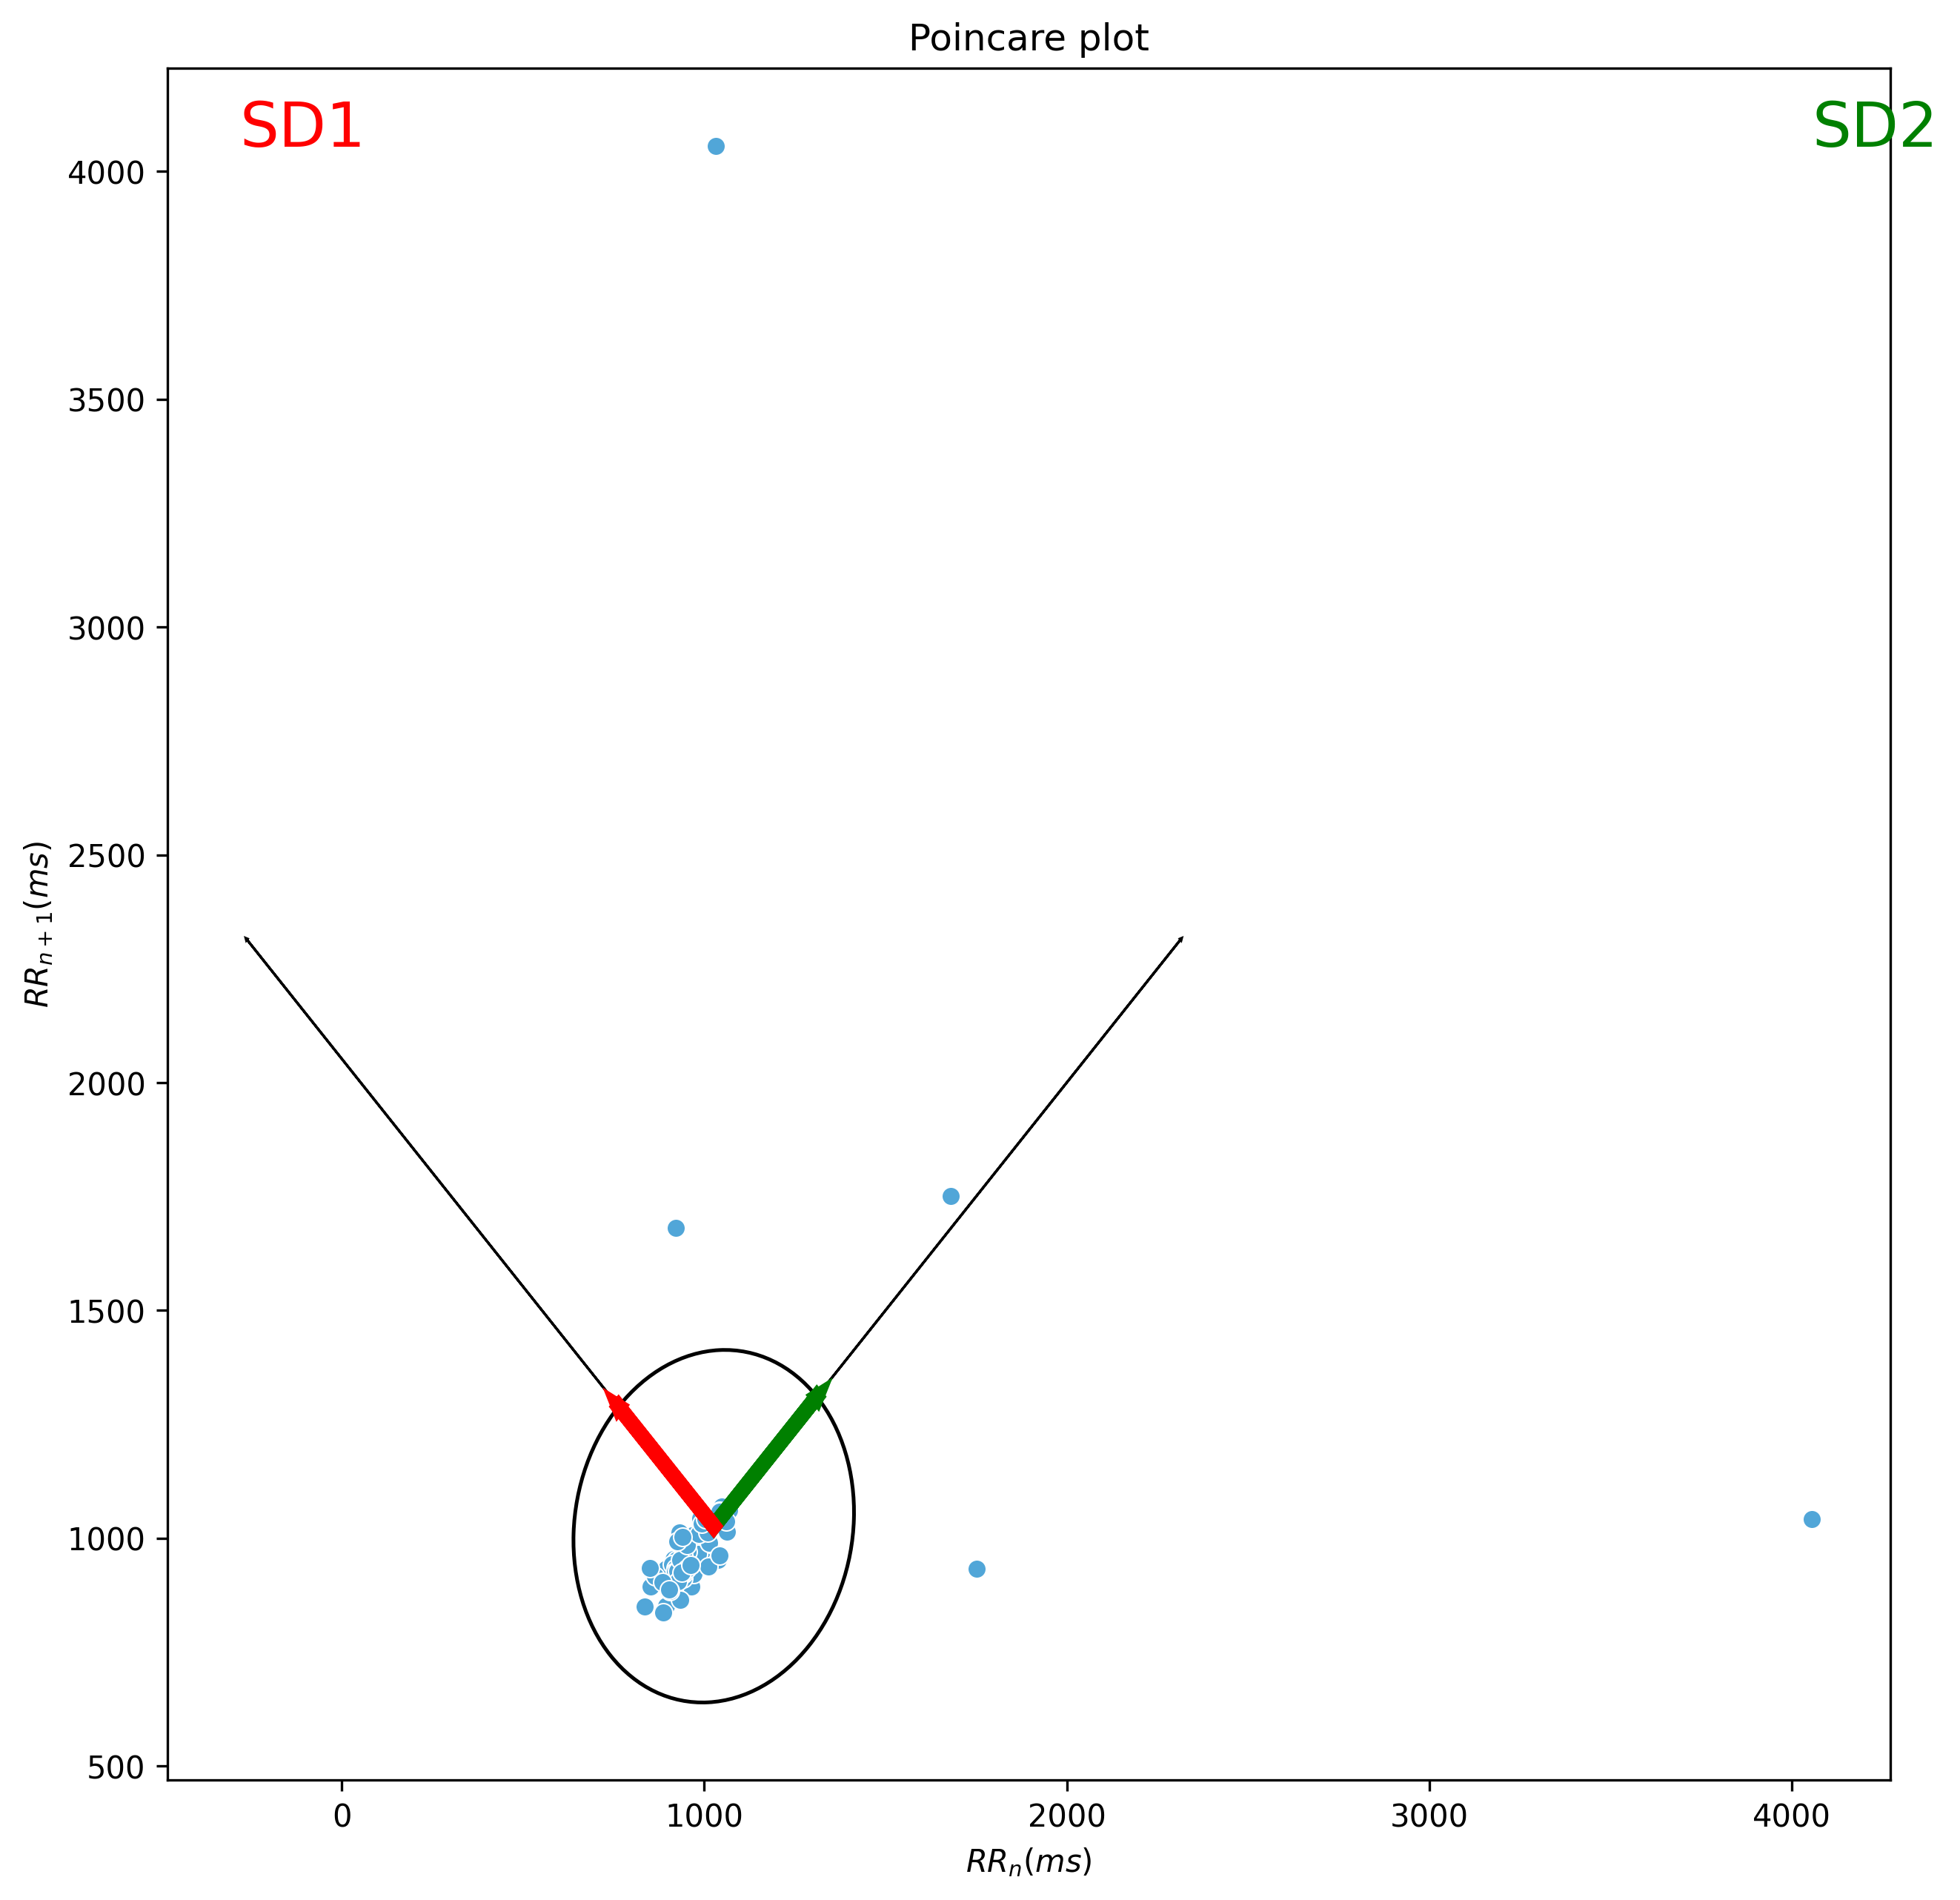

In [816]:
sd1, sd2 = plot_poincare(rr_ecg_pred)
print("SD1: %.3f ms" % sd1)
print("SD2: %.3f ms" % sd2)

SD1: 311.179 ms
SD2: 236.978 ms


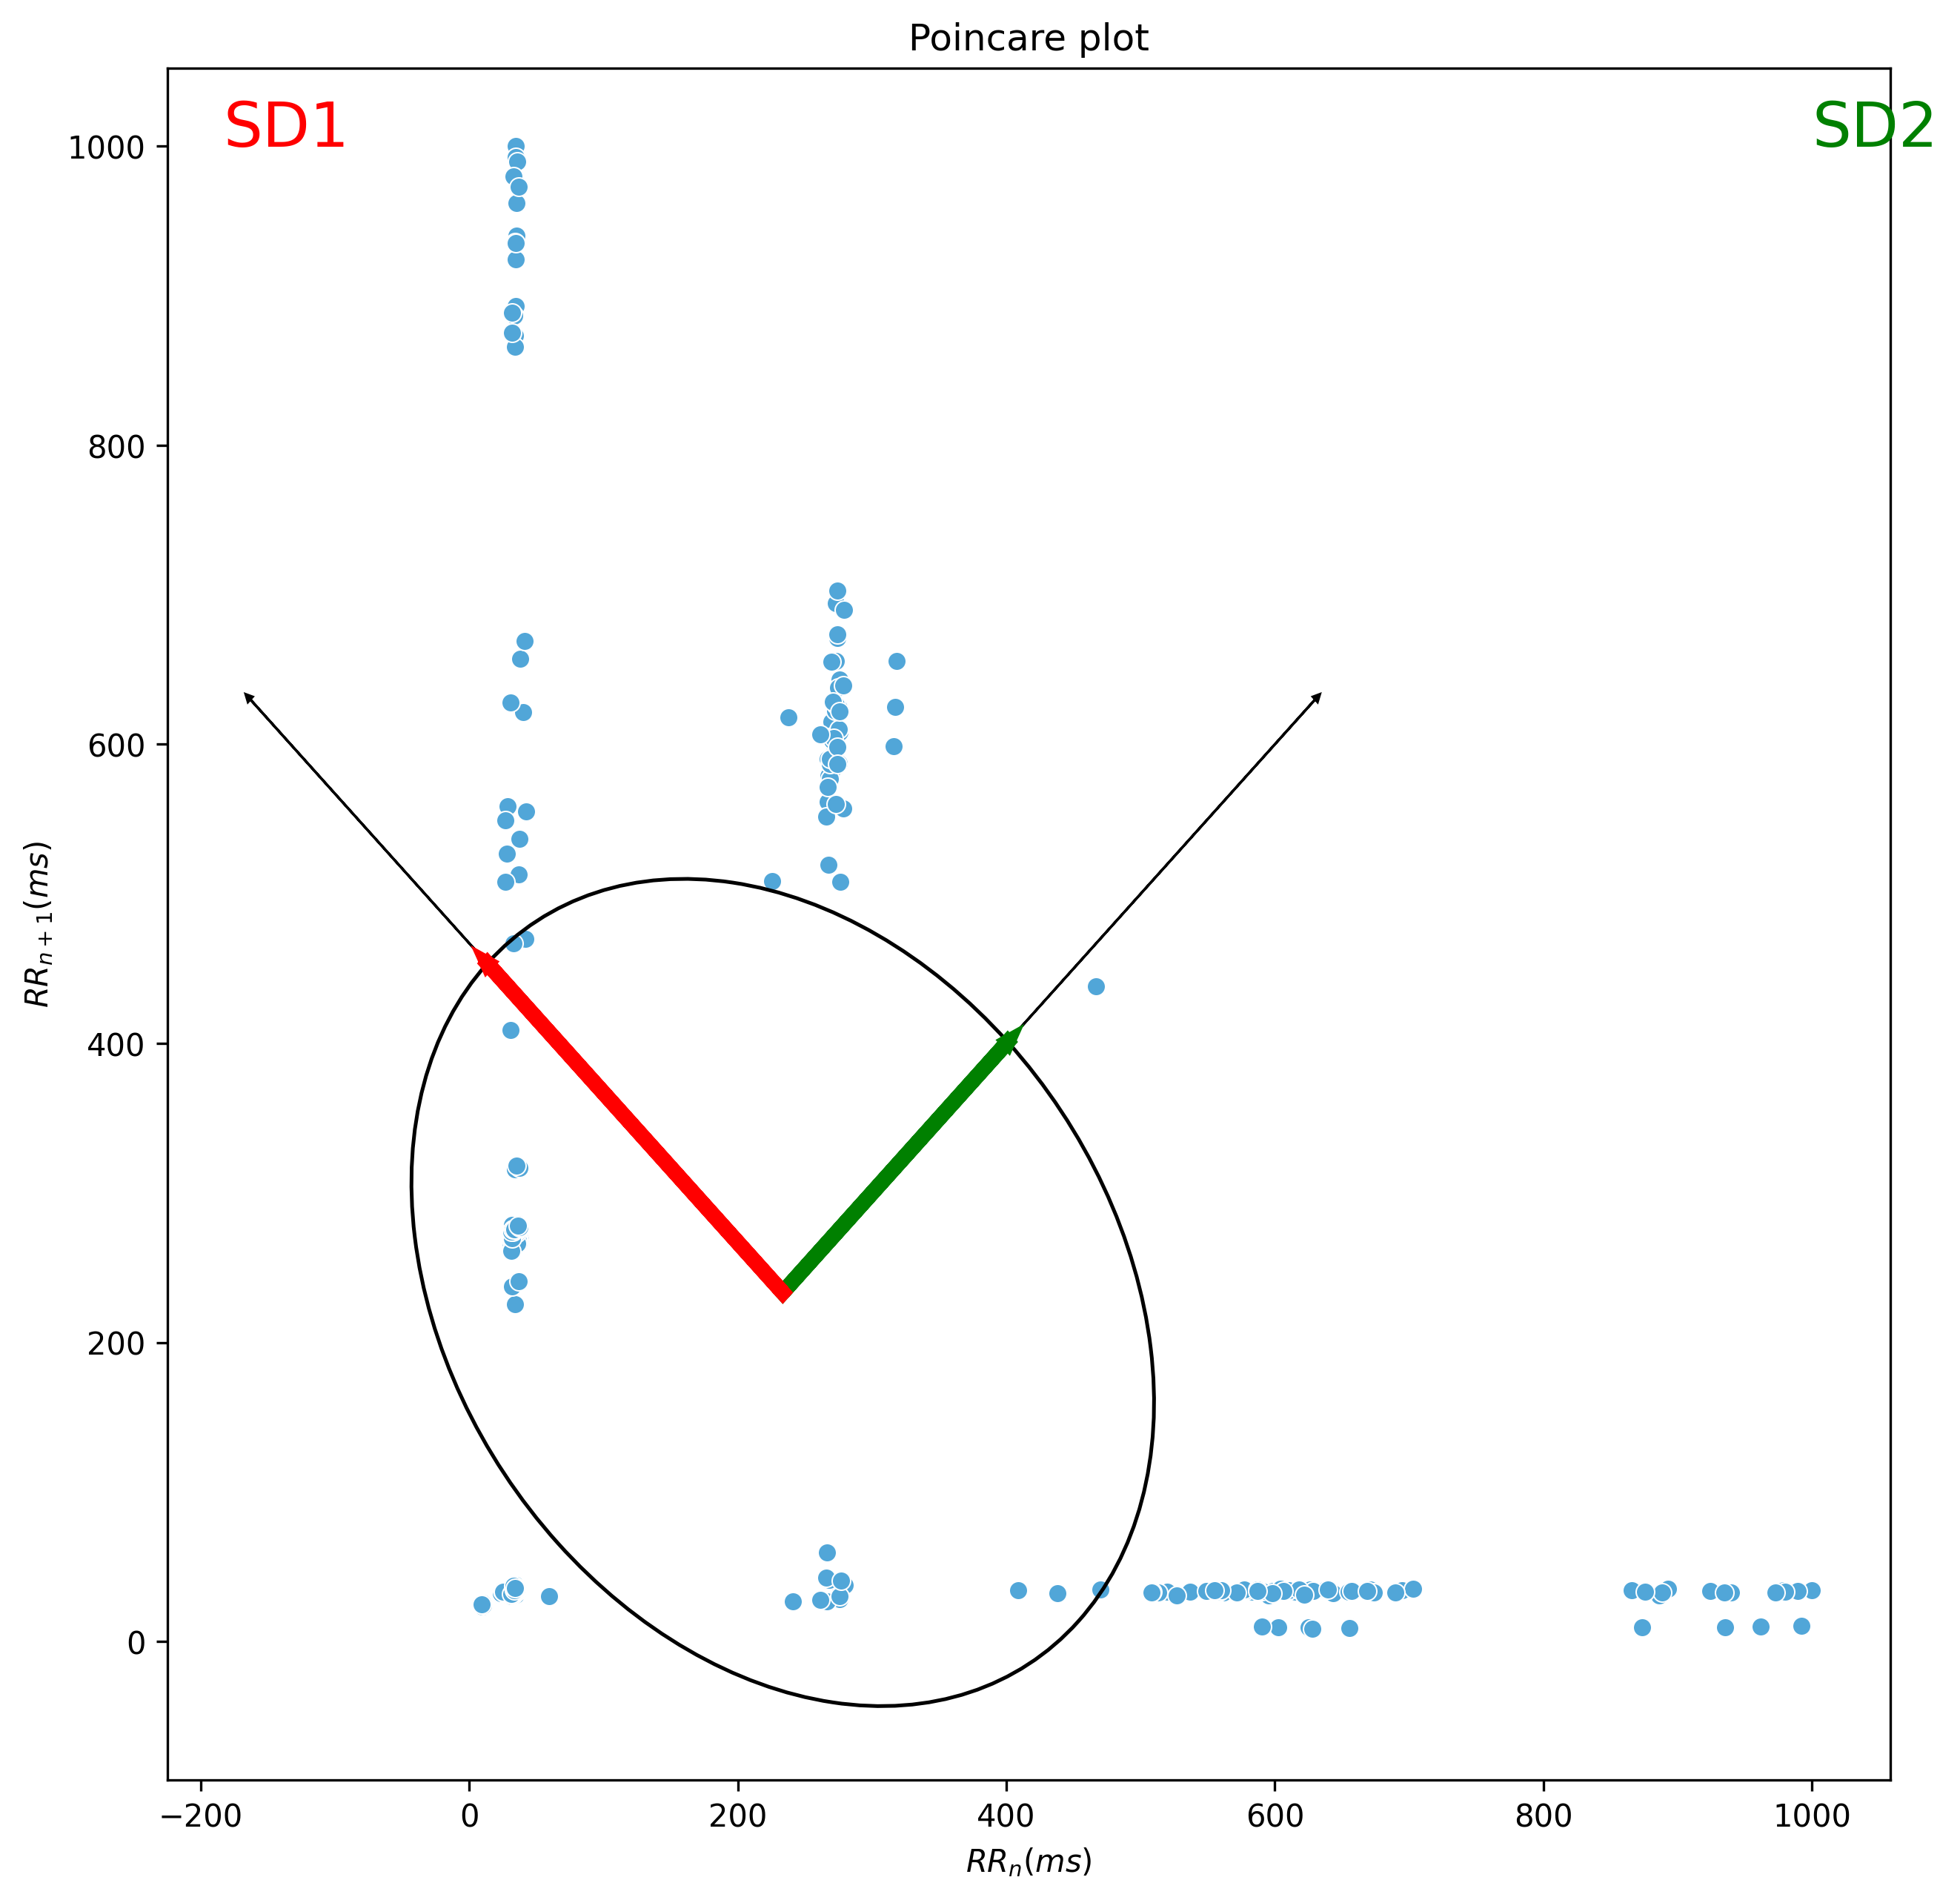

In [817]:
sd1, sd2 = plot_poincare(rr_scg)
print("SD1: %.3f ms" % sd1)
print("SD2: %.3f ms" % sd2)

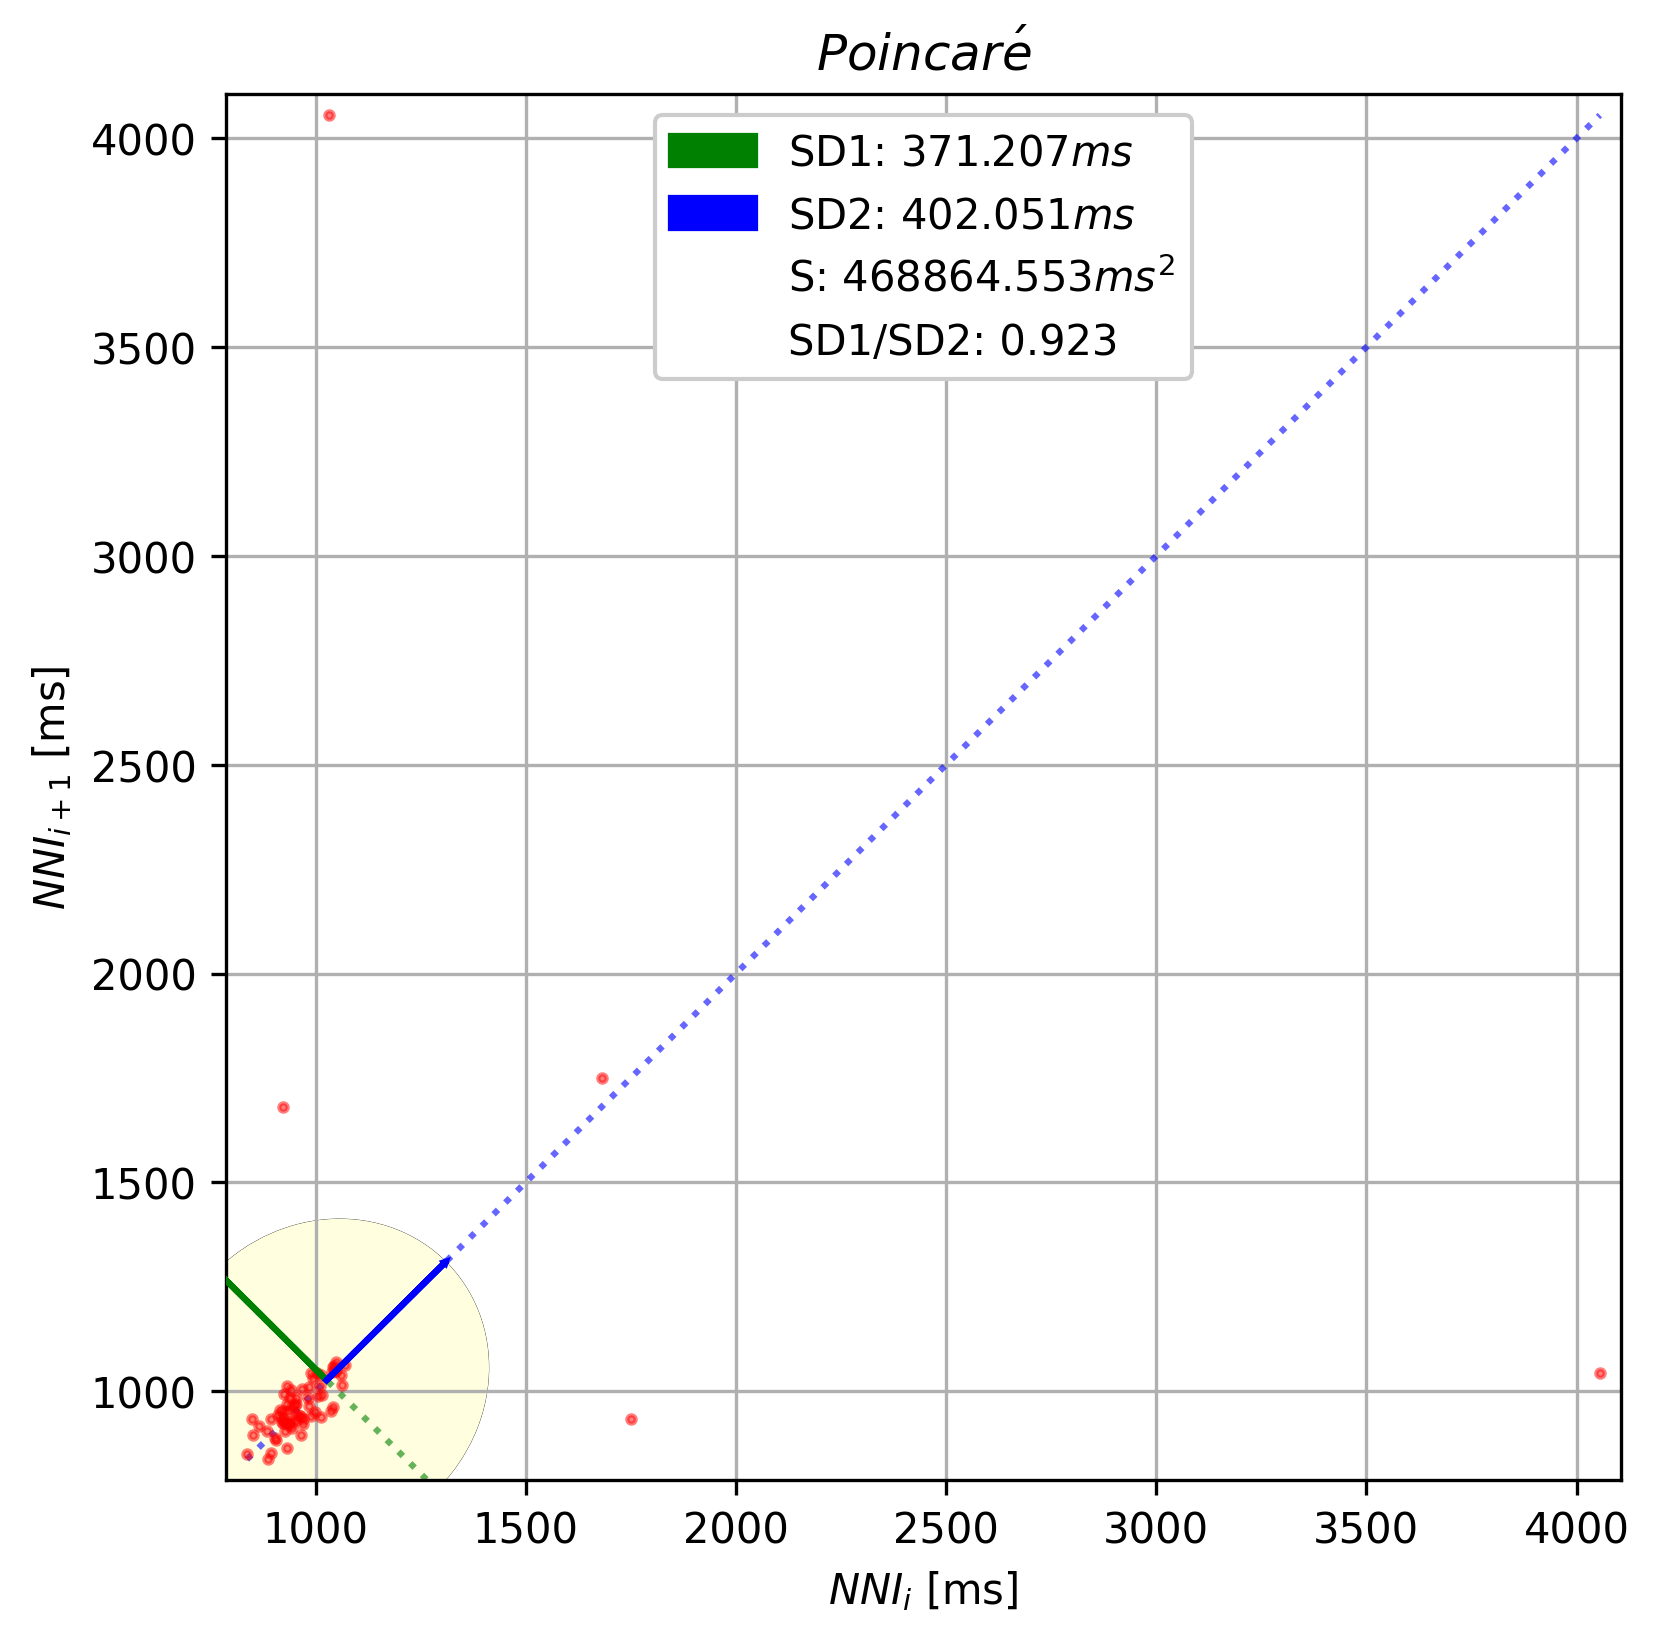

ReturnTuple(poincare_plot=<Figure size 1800x1800 with 1 Axes>, sd1=371.20679088733385, sd2=402.0514334483457, sd_ratio=1.083092883315202, ellipse_area=468864.55262605305)

In [818]:
import pyhrv
pyhrv.nonlinear.poincare(rr_ecg_pred,peaks_ecg_pred)

In [819]:
from scipy.stats import pearsonr
true = y_test.astype('float')
pre =  x_g_AB.astype('float')
corr, pval =pearsonr(true.flatten(),pre.flatten())
print("corre and p-val:: ",corr, pval)


pre_smoothed =  x_g_AB_smoothed.astype('float')
corr_sm, pval_sm =pearsonr(true.flatten(),pre_smoothed.flatten())
print("smoothed corre and p-val:: ",corr_sm, pval_sm)

corre and p-val::  0.2718932970272414 0.0
smoothed corre and p-val::  0.26784936832916856 0.0


In [820]:
accuracy_for_AtoB = 100 - (np.mean(np.abs(x_g_AB-y_test)*100))
print(accuracy_for_AtoB)

accuracy_for_AtoB_sm = 100 - (np.mean(np.abs(x_g_AB_smoothed-y_test)*100))
print("smoothed",accuracy_for_AtoB_sm)

35.49265004279793
smoothed 35.36996143568956


In [821]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300


In [822]:
print(len(str(fileNames[0]))-4)

4


In [823]:
# from google.colab import files
# fig = plt.figure(figsize=(4,3))
# fig.set_size_inches(50,7)
# plt.plot(y_test.flatten()[:5000],color="blue")
# plt.plot(np.array(x_g_AB).flatten()[:5000], color="red")
# plt.show()
# fig.savefig('/content/drive/MyDrive/Colab Notebooks/basal/b_to_b_'+str(fileNames[0])[0:len(str(fileNames[0]))-4]+'_first_5000.jpg')

In [824]:
# from google.colab import files
# fig = plt.figure(figsize=(4,3))
# fig.set_size_inches(50,7)
# plt.plot(y_test.flatten()[:5000],color="blue")
# # plt.plot(np.array(x_g_AB).flatten()[:5000], color="red")
# plt.show()
# fig.savefig('/content/drive/MyDrive/Colab Notebooks/basal/b_to_b_'+str(fileNames[0])[0:len(str(fileNames[0]))-4]+'_blue.jpg')

In [825]:
# from google.colab import files
# fig = plt.figure(figsize=(4,3))
# fig.set_size_inches(50,7)
# # plt.plot(y_test.flatten()[:5000],color="blue")
# plt.plot(np.array(x_g_AB).flatten()[:5000], color="red")
# plt.show()
# fig.savefig('/content/drive/MyDrive/Colab Notebooks/basal/b_to_b_'+str(fileNames[0])[0:len(str(fileNames[0]))-4]+'_red.jpg')

In [826]:
# from google.colab import files
# fig = plt.figure(figsize=(4,3))
# fig.set_size_inches(50,7)
# plt.plot(y_test.flatten()[:5000],color="blue")
# plt.plot(np.array(x_g_AB_smoothed).flatten()[:5000], color="red")
# plt.show()
# fig.savefig('/content/drive/MyDrive/Colab Notebooks/basal/b_to_b_'+str(fileNames[0])[0:len(str(fileNames[0]))-4]+'_first_5000_smoothed.jpg')

In [827]:
# from google.colab import files
# fig = plt.figure(figsize=(4,3))
# fig.set_size_inches(50,7)
# plt.plot(y_test.flatten()[:5000],color="blue")
# # plt.plot(np.array(x_g_AB_smoothed).flatten()[:5000], color="red")
# plt.show()
# fig.savefig('/content/drive/MyDrive/Colab Notebooks/basal/b_to_b_'+str(fileNames[0])[0:len(str(fileNames[0]))-4]+'_blue_smoothed.jpg')

In [828]:
# from google.colab import files
# fig = plt.figure(figsize=(4,3))
# fig.set_size_inches(50,7)
# # plt.plot(y_test.flatten()[:5000],color="blue")
# plt.plot(np.array(x_g_AB_smoothed).flatten()[:5000], color="red")
# plt.show()
# fig.savefig('/content/drive/MyDrive/Colab Notebooks/basal/b_to_b_'+str(fileNames[0])[0:len(str(fileNames[0]))-4]+'_red_smoothed.jpg')

In [829]:
# for i in range(len(y_test)):
#   fig = plt.figure(figsize=(4,3))
#   fig.set_size_inches(50,7)
#   plt.plot(y_test[i],color="blue")
#   plt.plot(x_g_AB[i], color="red")
#   plt.show()
#   plt.savefig('/content/drive/MyDrive/Colab Notebooks/GAN_PAPER_DATA/basal/b_to_b_1_batch_'+str(i+1)+'.jpg')

In [830]:
# for i in range(len(y_test)):
#   fig = plt.figure(figsize=(4,3))
#   fig.set_size_inches(50,7)
#   plt.plot(y_test[i],color="blue")
#   plt.plot(x_g_AB_smoothed[i], color="red")
#   plt.savefig('/content/drive/MyDrive/Colab Notebooks/GAN_PAPER_DATA/basal/b_to_b_1_smoothed_batch_'+str(i+1)+'.jpg')
#   plt.show()

In [831]:
# !pip install frechetdist

In [832]:
# import sys
# print(sys.getrecursionlimit())
# sys.setrecursionlimit(5000)
# print(sys.getrecursionlimit())

In [833]:
# from frechetdist import frdist
# fd = []
# for i in range(len(y_test)):
#   fd.append(frdist(y_test[i],x_g_AB[i]))
# print("FD: ", np.array(fd).mean())

In [834]:

#mmd_arr = mmd(y_test,x_g_AB)

In [835]:
# fd_mean = np.array(fd).mean()

In [836]:
#To create the blank csv with header.

#from csv import writer

#List=["Subject","Generator param A", "Generator param B","Reconstructor param A","Reconstructor param B","RMSE flattened", "RMSE Smoothed flattened","RMSE All Mean", "RMSE All Smoothed Mean", "prd", "prd smoothed","mae","mae smoothed", "correlation","correlation smoothed","p-val","p-val smoothed","accuracy","accuracy smoothed","frachet dist"]

#with open('/content/drive/MyDrive/Colab Notebooks/GAN_PAPER_DATA/basal/matrices.csv', 'w') as f_object:

#    writer_object = writer(f_object)
#    writer_object.writerow(List)

#    f_object.close()

In [837]:
# change the parameters here
gen_param_a = 0
gen_param_b = 0
rec_param_a = 0
rec_param_b = 0

In [838]:
# List
List_vals =[fileNames[0], gen_param_a,gen_param_b,rec_param_a,rec_param_b, rmse_arr, rmse_smoothed, rmse_all_mean, rmse_all_smoothed_mean, prd_arr, prd_arr_smoothed,mae_arr,mae_arr_smoothed, corr,corr_sm,pval,pval_sm,accuracy_for_AtoB,accuracy_for_AtoB_sm]

In [839]:

# from csv import writer

# with open('/content/drive/MyDrive/Colab Notebooks/basal/matrices.csv', 'a') as f_object:

#     writer_object = writer(f_object)
#     writer_object.writerow(List_vals)

#     f_object.close()

In [840]:
# !pip install torch

In [841]:
# !pip install -c dloewenstein torch-two-sample

In [842]:
#!pip install mmd

In [843]:
# !pip install torch torchvision



In [844]:
# from torch_two_sample.statistics_diff import MMDStatistic
# print(mmd(y_test,x_g_AB))

In [845]:
#!pip install ecg_plot

In [846]:
#import ecg_plot

In [847]:
#for i in range(10):
#  ecg_plot.plot_1(y_test_scaled[i], sample_rate=500, title = 'Original ECG')
 # ecg_plot.plot_1(x_g_AB_scaled[i], sample_rate=500, title = 'Predicted ECG')
  #plt.tight_layout()
 # ecg_plot.show()

In [848]:

#ecg_plot.plot_1(y_test.flatten(), sample_rate=1000, title = 'Original')
#ecg_plot.plot_1(x_g_AB.flatten(), sample_rate=1000, title = 'Predicted')

In [849]:
#x = y_test[0].flatten().tolist()
#y = x_g_AB[0].flatten().tolist()
#for i in range(len(x_g_AB)):
#  x.append((y_test[i][len(y_test[i])-1])[0])
#  y.append((x_g_AB[i][len(x_g_AB[i])-1])[0])

In [850]:
print("acc: %3d%%"% accuracy_for_AtoB)

acc:  35%


In [851]:
# normalize correlation
a = (y_test - np.mean(y_test)) / (np.std(y_test) * len(y_test))
b = (x_g_AB - np.mean(x_g_AB)) / (np.std(x_g_AB))
c = np.correlate(a.flatten(), b.flatten(), 'full')
print(c)

[0.00150333 0.00374541 0.00611158 ... 0.00359258 0.00223957 0.00098267]


In [852]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test.flatten(), x_g_AB.flatten())
print(mse)

1.1119491800537926


In [853]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test.flatten(), x_g_AB.flatten())
print(mae)

0.6450734995720205


In [854]:
y_pred = x_g_AB.flatten()
y_test_new = y_test.flatten()

In [855]:

y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0

In [856]:

y_test_new[y_test_new > 0.5] = 1
y_test_new[y_test_new <= 0.5] = 0

In [857]:
from sklearn.metrics import f1_score,accuracy_score,recall_score,precision_score


In [858]:

print("accuracy_score",accuracy_score(y_test_new, y_pred))

accuracy_score 0.8073466666666667


In [859]:

print("precision_score",precision_score(y_test_new, y_pred , pos_label='positive', average='micro'))

precision_score 0.8073466666666667


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [860]:

print("f1_score",f1_score(y_test_new, y_pred, pos_label='positive', average='micro'))

f1_score 0.8073466666666667


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [861]:

print("recall_score",recall_score(y_test_new, y_pred, pos_label='positive', average='micro'))

recall_score 0.8073466666666667


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [862]:
from sklearn.metrics import confusion_matrix
a = [1,1,1,1,1,0]
b=[1,1,1,1,0,0]
matrix = confusion_matrix(y_test_new, y_pred)
print(matrix)

[[54345  4937]
 [ 9512  6206]]


In [863]:
# correlation coefficient r of x and y
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(y_test_new, y_pred)
print (r_value)

0.356523466708812


In [864]:
# The coefficient of determination
from sklearn.metrics import r2_score
print(r2_score(y_test_new, y_pred))

-0.16299787980284197
